In [75]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [76]:
df=pd.read_csv("C:/Users/yaazhisai/Desktop/Final capstone/insurance_dataset.csv")

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no


In [79]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
Outcome           0
dtype: int64

In [80]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Outcome'],
      dtype='object')

In [81]:
df1=df.copy()

In [82]:
df1.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no


In [83]:
# Encoding techniques

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

df1['job']=OrdinalEncoder().fit_transform(df1[['job']])
df1['marital']=LabelEncoder().fit_transform(df1['marital'])
df1['education_qual']=OrdinalEncoder().fit_transform(df1[['education_qual']])
df1['call_type']=LabelEncoder().fit_transform(df1['call_type'])
df1['prev_outcome']=LabelEncoder().fit_transform(df1['prev_outcome'])



In [84]:
df1['mon']=df1['mon'].map({'jan':1,"feb":2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [85]:
df1['Outcome'].value_counts()

Outcome
no     39916
yes     5289
Name: count, dtype: int64

In [86]:
df1['Outcome']=df1['Outcome'].map({'no':0,'yes':1})

In [87]:
df1['Outcome'].value_counts()

Outcome
0    39916
1     5289
Name: count, dtype: int64

In [88]:
df1.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,4.0,1,2.0,2,5,5,261,1,3,0
1,44,9.0,2,1.0,2,5,5,151,1,3,0


In [89]:
cols=df1.columns

In [90]:
X=df1[['job', 'marital','education_qual', 'call_type', 'day', 'mon','age','dur', 'num_calls', 'prev_outcome']]



In [91]:
kmeans_model=KMeans()
kmeans_model=kmeans_model.fit(X)

In [92]:
kmeans_model=KMeans()
kmeans_model=kmeans_model.fit_predict(X)

In [93]:
kmeans_model

array([3, 4, 0, ..., 5, 1, 3])

In [95]:
# HYPERPARAMETER TUNNING
#K VALUE B/W 1 AND 15
def try_clusters(data,K):

    cluster_values = list(range(1, K+1))
    dist=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        dist.append(model.inertia_) # inertia is used to segregate the data points into clusters
    return dist

In [96]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



In [97]:
wcss

[3007735398.8119364,
 1166205918.0397348,
 640068430.8396498,
 410812381.2783201,
 289751418.7096404,
 213200436.91298962,
 165275417.70691973,
 129925650.0636534,
 105732781.04587284,
 87927367.70185758,
 76086102.29923747,
 64084810.18603908,
 58870707.21147903,
 51908268.58630155,
 45713603.81023587]

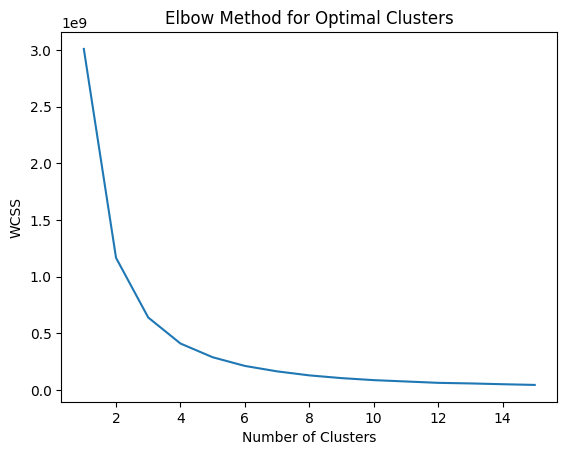

In [116]:
plt.plot(range(1, 16), wcss)#x-axis=range(1,16),y-axis=wcss
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The data provided shows the sum of squared distances (often referred to as the "inertia" or "within-cluster sum of squares") for different numbers of clusters. This metric measures the total distance between data points and their respective cluster centroids. Generally, a lower sum of squared distances indicates better clustering because it means that the data points are closer to their centroids.

In [117]:
out=try_clusters(X,15)
distances = pd.DataFrame({"clusters": list(range(1, 16)),"sum of squared distances": out})
distances

,clusters,sum of squared distances
0,1,3.007735e+09
1,2,1.166206e+09
2,3,6.400684e+08
3,4,4.108124e+08
4,5,2.897514e+08
5,6,2.132004e+08
6,7,1.652754e+08
7,8,1.299257e+08
8,9,1.057328e+08
9,10,8.792737e+07


In [118]:
out

[3007735398.8119364,
 1166205918.0397348,
 640068430.8396498,
 410812381.2783201,
 289751418.7096404,
 213200436.91298968,
 165275417.70691973,
 129925650.0636534,
 105732781.04587284,
 87927367.70185758,
 76086102.29923747,
 64084810.186039105,
 58870707.21147902,
 51908268.58630155,
 45713603.81023587]

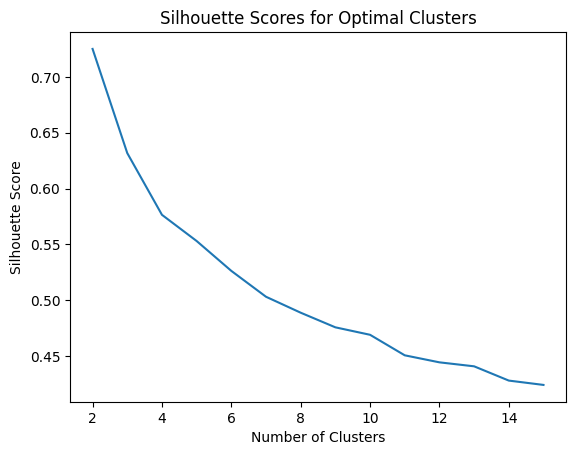

In [102]:
# Silhouette Score to determine the number of clusters
silhouette_scores = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 16), silhouette_scores)
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [103]:
silhouette_scores

[0.7250677211551866,
 0.6317851870021866,
 0.5765061597427383,
 0.5530510851334135,
 0.5263023903733904,
 0.5031246118320036,
 0.48884705686347885,
 0.4757457250742257,
 0.4690609039951257,
 0.4506815894776856,
 0.44439006752718374,
 0.44082781854430186,
 0.42804696253687297,
 0.42416825996939367]

In [119]:
# Fit KMeans with the optimal number of clusters
optimal_clusters = 4
kmeans_model_new= KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=400, random_state=42)
clusters = kmeans_model_new.fit_predict(X)

# Add cluster labels to the original data
df['Cluster'] = clusters
df1['Clusters']=clusters

In [110]:
clusters

array([2, 0, 0, ..., 3, 2, 2])

In [120]:
# Print the cluster centers
centers = scaler.inverse_transform(kmeans_model_new.cluster_centers_)
print("Cluster Centers:\n", centers)



Cluster Centers:
 [[1.85097272e+01 1.87207978e+00 2.14002587e+00 1.22865492e+00
  1.49683799e+02 2.10833821e+01 4.77575585e+02 3.06374243e+04
  1.20933500e+01 5.09486633e+00]
 [1.84330877e+01 1.88349546e+00 2.13846630e+00 1.16854421e+00
  1.47431939e+02 2.09157206e+01 4.74673227e+02 1.80011468e+05
  1.05699539e+01 5.12434683e+00]
 [1.86414944e+01 1.88767207e+00 2.14229940e+00 1.20257655e+00
  1.42743109e+02 2.06374108e+01 4.71912064e+02 8.51528267e+04
  9.96633921e+00 5.06871596e+00]
 [1.86229058e+01 1.88944067e+00 2.16248456e+00 1.20003763e+00
  1.42823939e+02 2.11325925e+01 4.75547291e+02 3.60060088e+05
  1.12149570e+01 5.18304149e+00]]


In [121]:
df['y1']=df['Outcome'].map({'no':0,'yes':1})

In [122]:
df.head(2)

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Cluster,y1
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,2,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,0


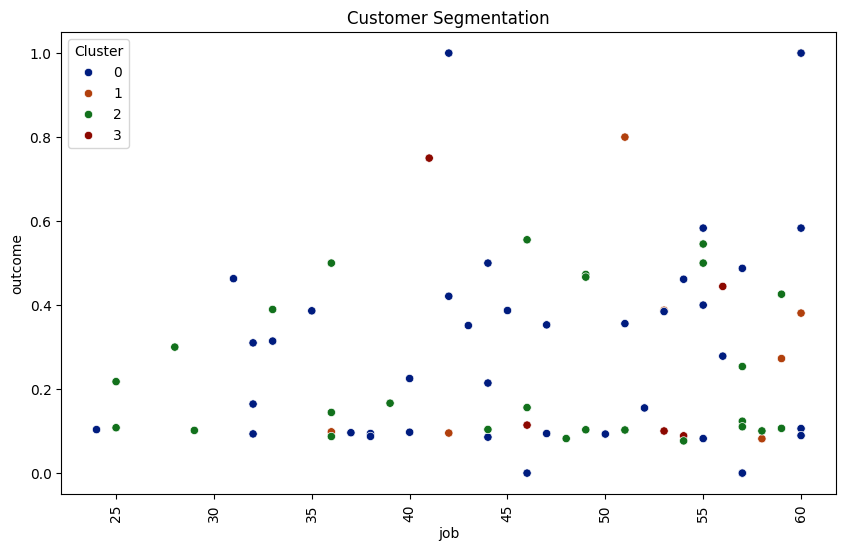

In [123]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df.groupby(['age'])['y1'].mean(), hue=df['Cluster'], palette='dark')
plt.title('Customer Segmentation')
plt.xlabel('job')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()

In [43]:
# Save the clustered data to a new CSV file
df1.to_csv('customer_clusters.csv', index=False)

In [44]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Cluster,y1
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,8,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,8,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,2,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,8,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,9,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,6,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,9,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,3,0


In [156]:
#saving the model

import pickle
with open("clustm_pkl","wb") as files:
  pickle.dump(kmeans_model_new, files)

with open("clustm_pkl","rb") as files:
  model=pickle.load(files)

In [45]:
df1

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Clusters
0,58,4.0,1,2.0,2,5,5,261,1,3,0,8
1,44,9.0,2,1.0,2,5,5,151,1,3,0,8
2,33,2.0,1,1.0,2,5,5,76,1,3,0,2
3,47,1.0,1,3.0,2,5,5,92,1,3,0,8
4,33,11.0,2,3.0,2,5,5,198,1,3,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1,2.0,0,17,11,977,3,3,1,9
45207,71,5.0,0,0.0,0,17,11,456,2,3,1,6
45208,72,5.0,1,1.0,0,17,11,1127,5,2,1,9
45209,57,1.0,1,1.0,1,17,11,508,4,3,0,3


In [124]:
grouped=df.groupby('Cluster')

In [127]:
# Access individual groups
cls0_df = grouped.get_group(0)
cls1_df = grouped.get_group(1)
cls2_df = grouped.get_group(2)
cls3_df = grouped.get_group(3)







In [128]:
# View the distribution of clusters
cluster_distribution = df['Cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)

Cluster Distribution:
Cluster
0    27185
2    12896
1     4212
3      912
Name: count, dtype: int64


In [170]:
c=['age','dur','num_calls']

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\2290454860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clus, x="Cluster", y=i,palette='dark')
C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\2290454860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clus, x="Cluster", y=i,palette='dark')
C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\2290454860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clus, x="Cluster", y=i,palette='dark')


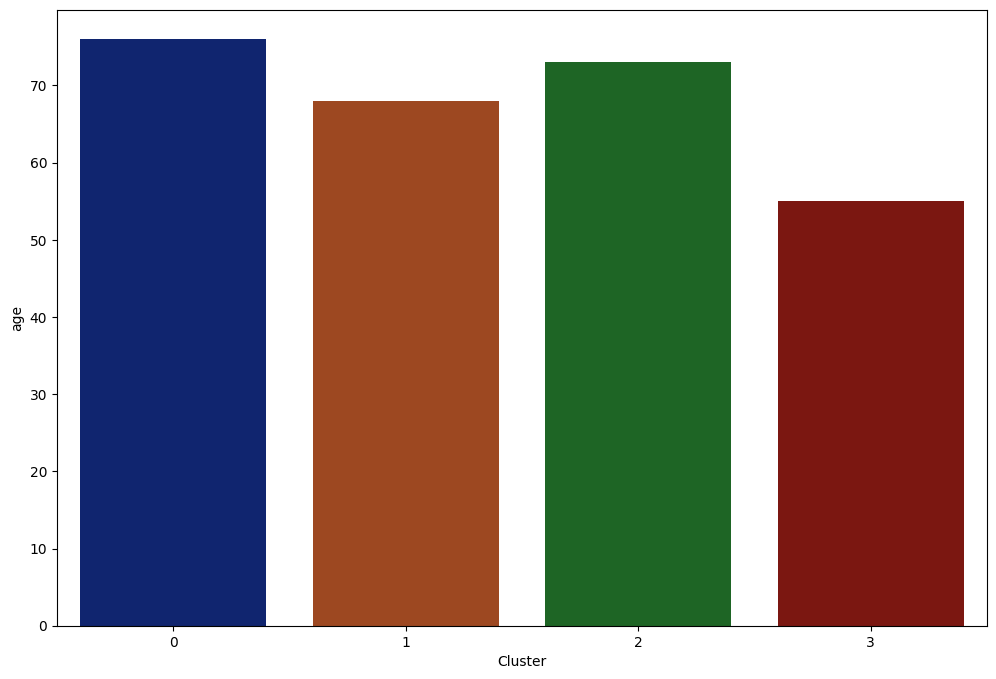

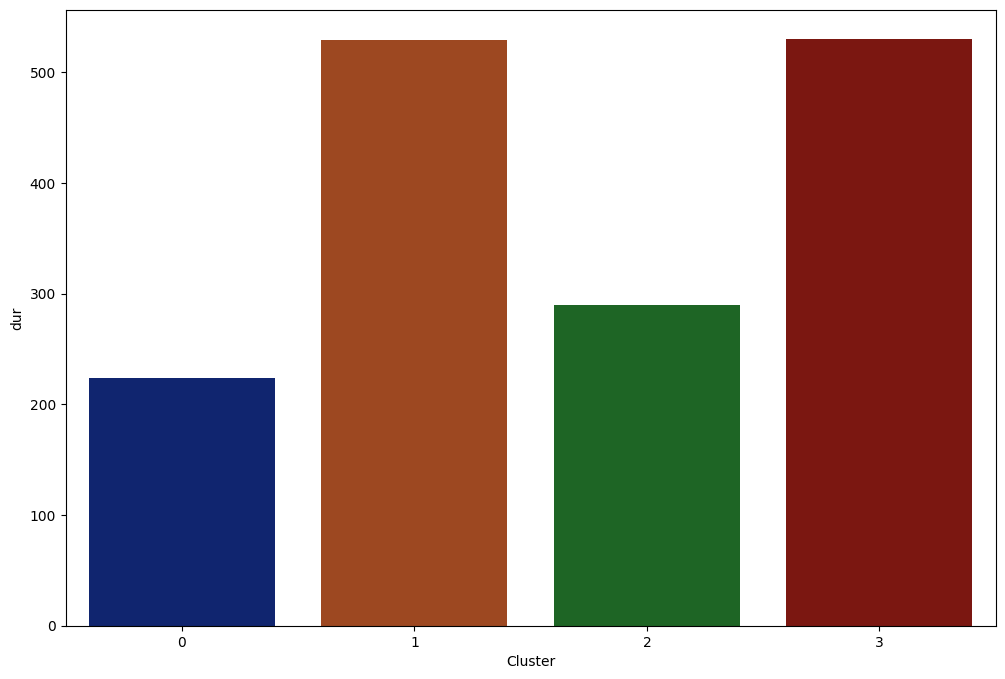

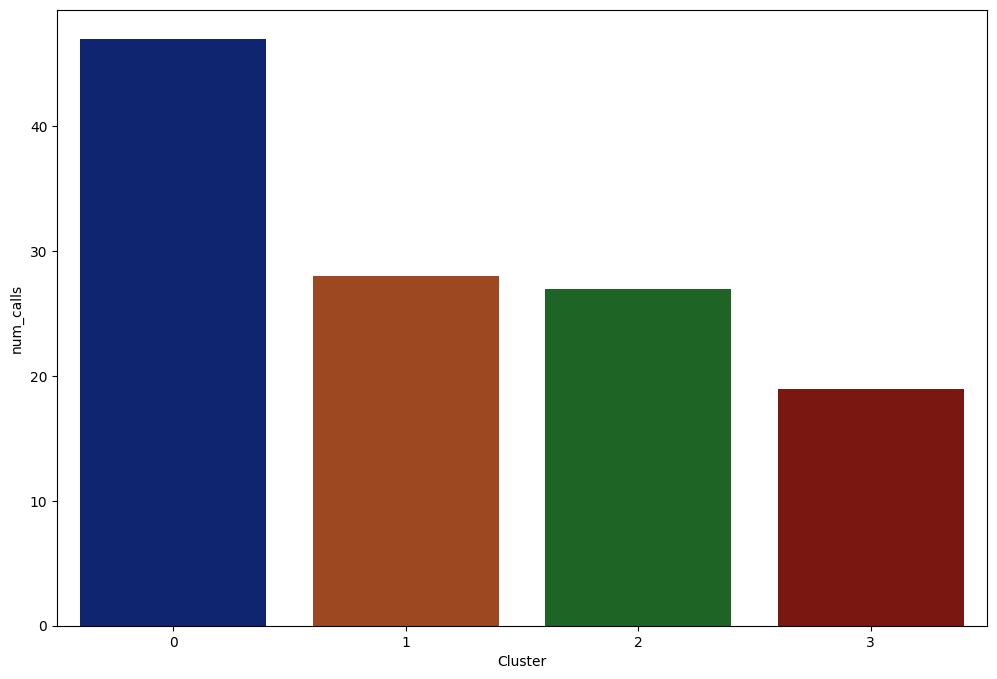

In [171]:
for i in c:
    df_clus=df.groupby('Cluster')[i].nunique().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(12,8))
    sns.barplot(data=df_clus, x="Cluster", y=i,palette='dark')

In [177]:
cls0_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27185.0,41.118558,10.323018,18.0,33.0,39.0,49.0,95.0
day,27185.0,16.086629,8.379234,1.0,9.0,17.0,22.0,31.0
dur,27185.0,117.961302,56.493427,0.0,75.0,117.0,163.0,223.0
num_calls,27185.0,3.011293,3.541333,1.0,1.0,2.0,3.0,63.0
Cluster,27185.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
y1,27185.0,0.041162,0.198669,0.0,0.0,0.0,0.0,1.0


In [176]:
cls1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4212.0,40.841880,11.156309,20.0,32.0,39.0,48.0,93.0
day,4212.0,15.813153,8.164597,1.0,9.0,16.0,21.0,31.0
dur,4212.0,697.891263,142.006189,514.0,578.0,664.0,795.0,1047.0
num_calls,4212.0,2.519943,2.414303,1.0,1.0,2.0,3.0,32.0
Cluster,4212.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
y1,4212.0,0.395537,0.489024,0.0,0.0,0.0,1.0,1.0


In [178]:
cls3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,912.0,40.942982,10.746303,22.0,33.0,39.0,48.00,89.0
day,912.0,15.276316,7.926416,1.0,8.0,16.0,20.00,31.0
dur,912.0,1396.712719,405.247117,1048.0,1142.0,1267.0,1499.25,4918.0
num_calls,912.0,2.725877,2.934609,1.0,1.0,2.0,3.00,55.0
Cluster,912.0,3.000000,0.000000,3.0,3.0,3.0,3.00,3.0
y1,912.0,0.599781,0.490211,0.0,0.0,1.0,1.00,1.0


In [179]:
cls4_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1185.0,40.373840,9.164755,19.0,33.0,39.0,47.0,95.0
day,1185.0,22.740928,7.518640,2.0,19.0,26.0,28.0,31.0
dur,1185.0,138.993249,184.530018,0.0,23.0,72.0,174.0,1484.0
num_calls,1185.0,16.777215,6.754077,9.0,12.0,15.0,19.0,63.0
Cluster,1185.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
y1,1185.0,0.029536,0.169374,0.0,0.0,0.0,0.0,1.0


In [130]:
cls0_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Cluster,y1
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0,0
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45185,60,services,married,tertiary,cellular,16,nov,200,1,success,yes,0,1
45189,25,services,single,secondary,cellular,16,nov,173,1,failure,no,0,0
45190,32,blue-collar,married,secondary,cellular,16,nov,206,1,success,yes,0,1
45194,59,management,married,tertiary,cellular,16,nov,162,2,failure,no,0,0


In [131]:
cls0_df['y1']=cls0_df['Outcome'].map({'no':0,'yes':1})
cls1_df['y1']=cls1_df['Outcome'].map({'no':0,'yes':1})
cls2_df['y1']=cls2_df['Outcome'].map({'no':0,'yes':1})
cls3_df['y1']=cls3_df['Outcome'].map({'no':0,'yes':1})


C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3059057640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls0_df['y1']=cls0_df['Outcome'].map({'no':0,'yes':1})
C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3059057640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls1_df['y1']=cls1_df['Outcome'].map({'no':0,'yes':1})
C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3059057640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [132]:
df1.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Outcome', 'Clusters'],
      dtype='object')

In [133]:
cls0_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Cluster,y1
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0,0
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45185,60,services,married,tertiary,cellular,16,nov,200,1,success,yes,0,1
45189,25,services,single,secondary,cellular,16,nov,173,1,failure,no,0,0
45190,32,blue-collar,married,secondary,cellular,16,nov,206,1,success,yes,0,1
45194,59,management,married,tertiary,cellular,16,nov,162,2,failure,no,0,0


C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\2349625338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='y1',data=ss1,palette='viridis')


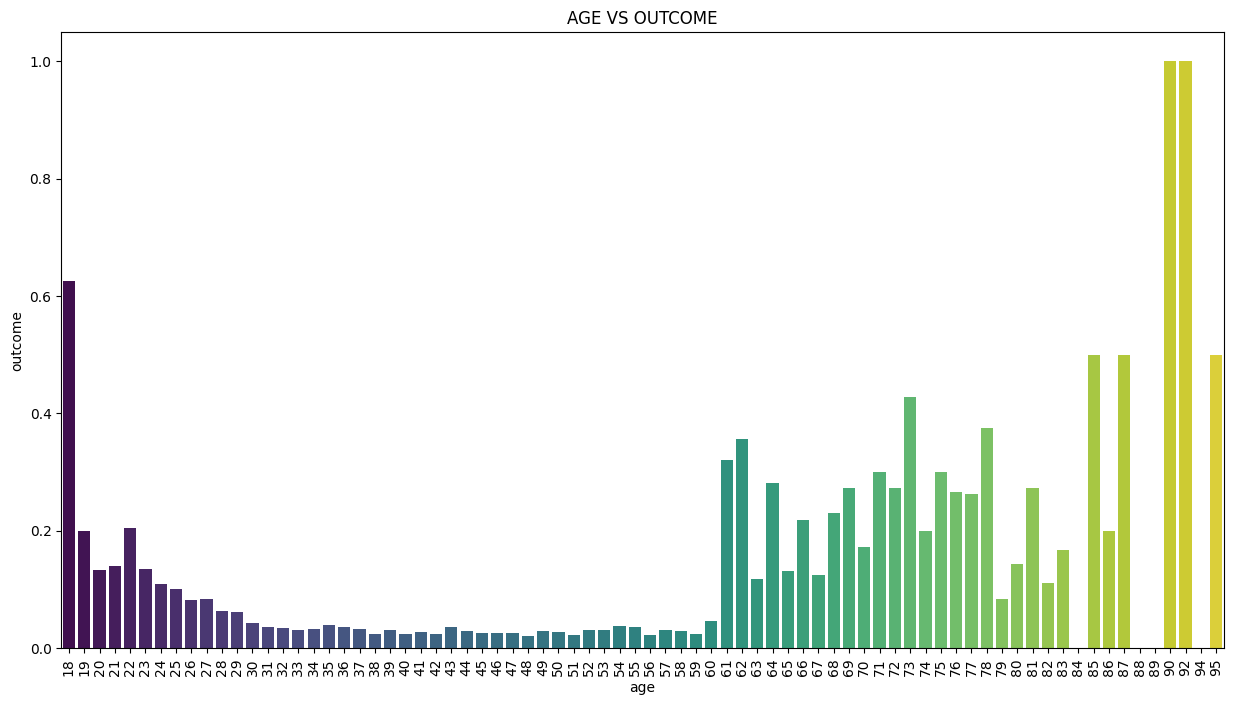

In [135]:
f=plt.figure(figsize=(15,8))
ss1=cls0_df.groupby(['age'])[['y1']].mean()
ss1.reset_index(inplace=True)
sns.barplot(x='age',y='y1',data=ss1,palette='viridis')
plt.title('AGE VS OUTCOME')
plt.xlabel('age')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN THIS CLUSTER 0,PPL AGED OLD (61-95) CONVERTED MORE

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3601288216.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job',y='y1',data=ss2,palette='pastel')


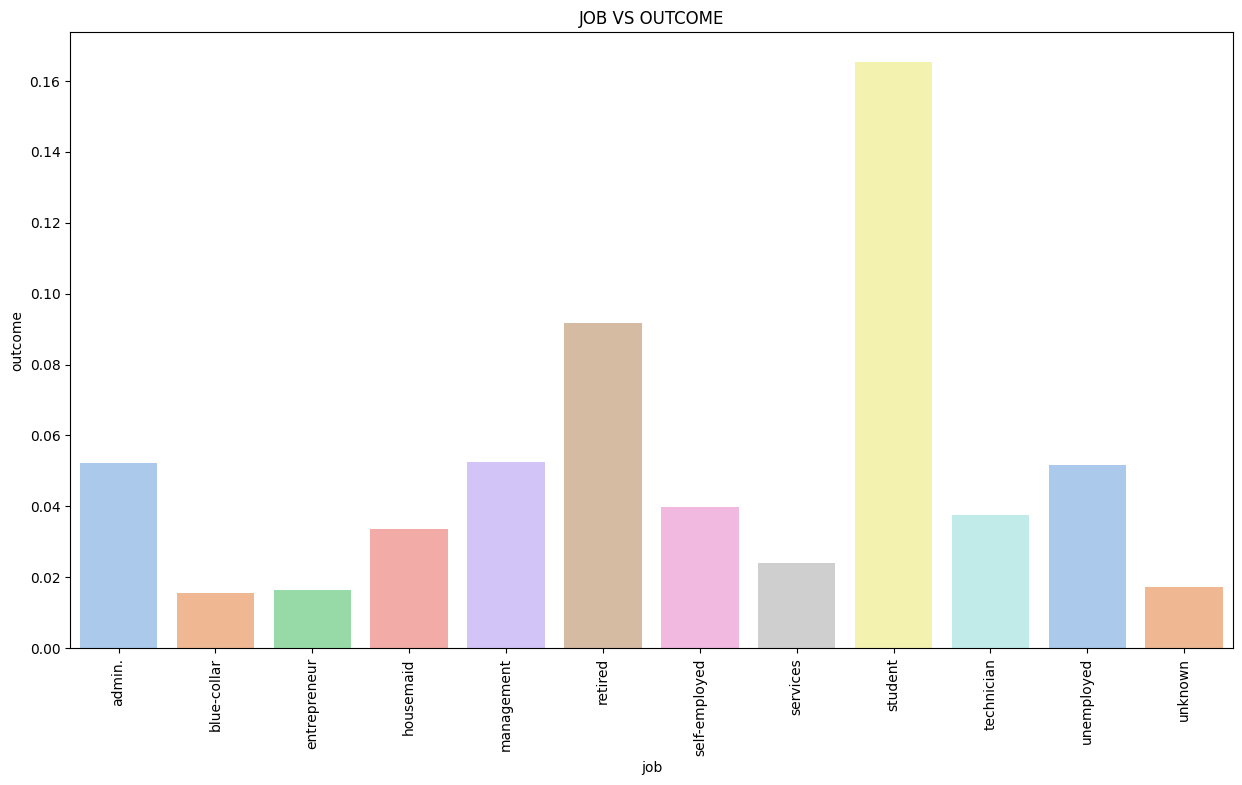

In [136]:
f=plt.figure(figsize=(15,8))
ss2=cls0_df.groupby(['job'])[['y1']].mean()
ss2.reset_index(inplace=True)
sns.barplot(x='job',y='y1',data=ss2,palette='pastel')
plt.title('JOB VS OUTCOME')
plt.xlabel('job')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN THIS CLUSTER, students and retired ppl are converted more

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3152330039.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marital',y='y1',data=ss3,palette=p)


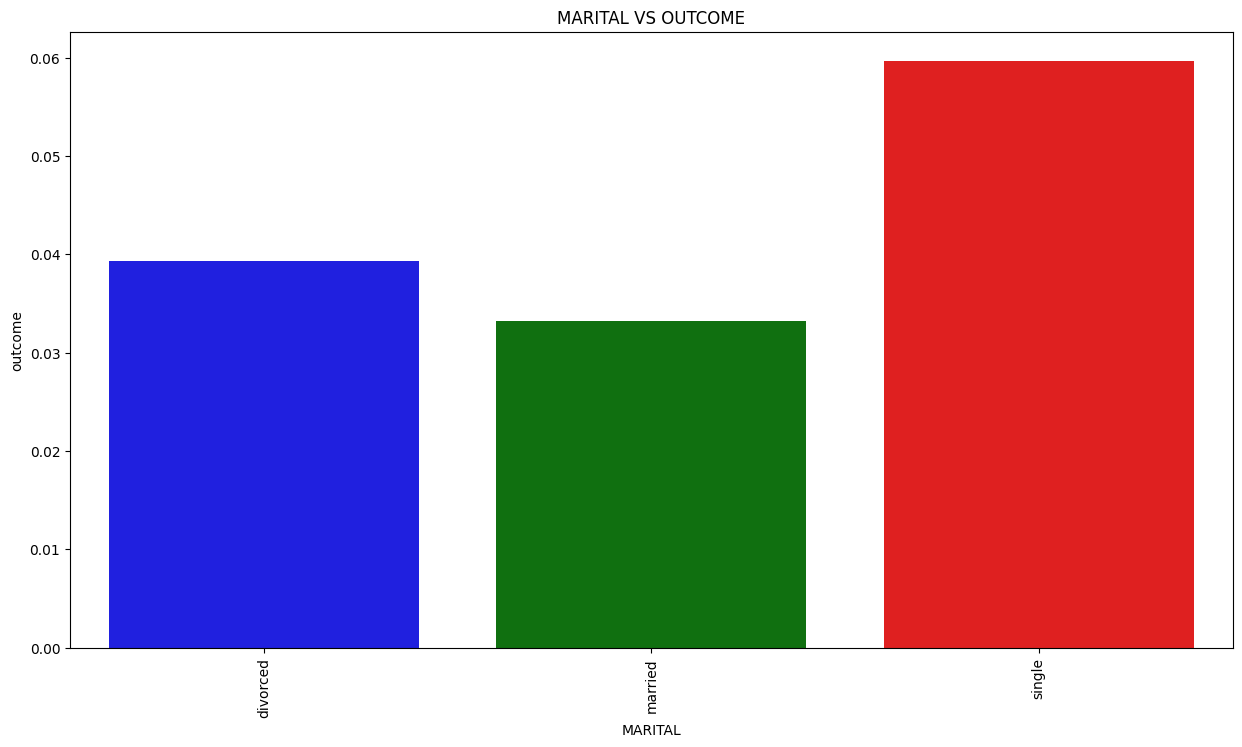

In [137]:
f=plt.figure(figsize=(15,8))
ss3=cls0_df.groupby(['marital'])[['y1']].mean()
ss3.reset_index(inplace=True)
p=['blue', 'green', 'red']
sns.barplot(x='marital',y='y1',data=ss3,palette=p)
plt.title('MARITAL VS OUTCOME')
plt.xlabel('MARITAL')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN THIS CLUSTER ,single ppl are converted more

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\2429315978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='call_type',y='y1',data=ss4,palette='dark')


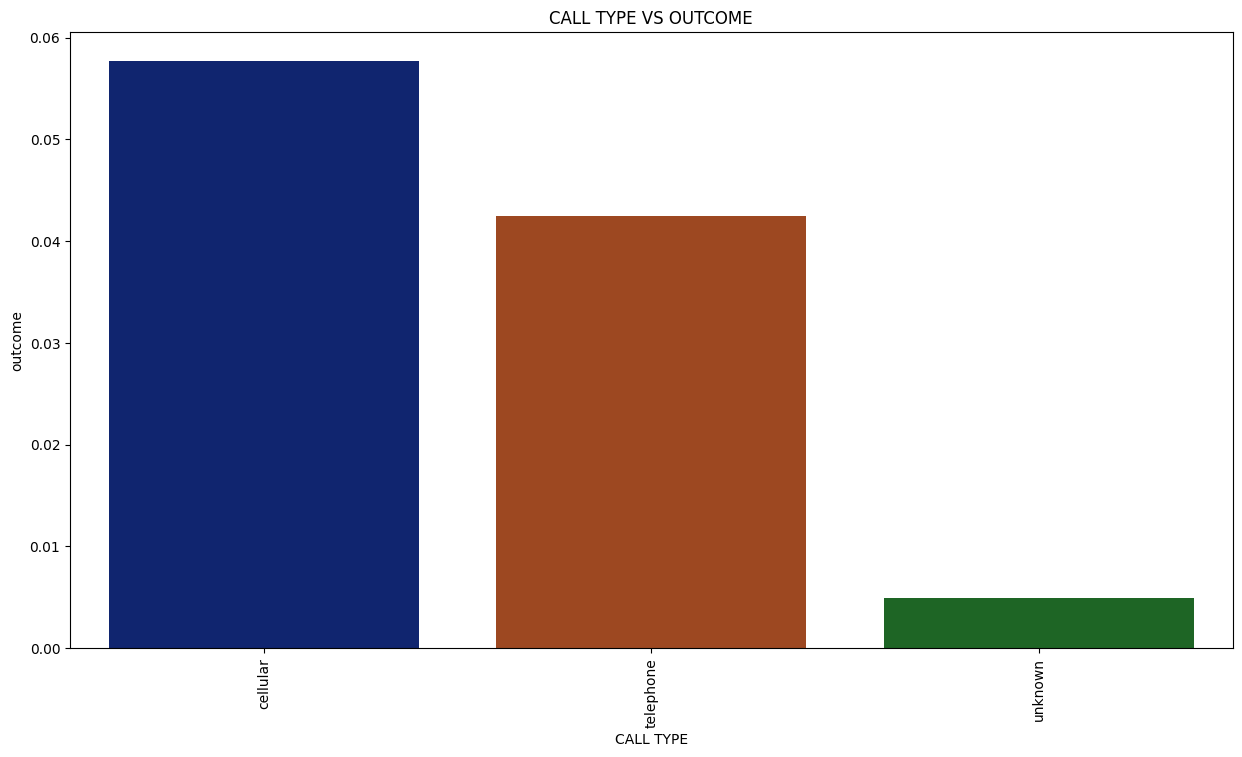

In [138]:
f=plt.figure(figsize=(15,8))
ss4=cls0_df.groupby(['call_type'])[['y1']].mean()
ss4.reset_index(inplace=True)
sns.barplot(x='call_type',y='y1',data=ss4,palette='dark')
plt.title('CALL TYPE VS OUTCOME')
plt.xlabel('CALL TYPE')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN THIS CLUSTER 0,ppl used cellular and telephone devices took insurance more compared to others

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\286693165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_calls',y='y1',data=ss5,palette='muted')


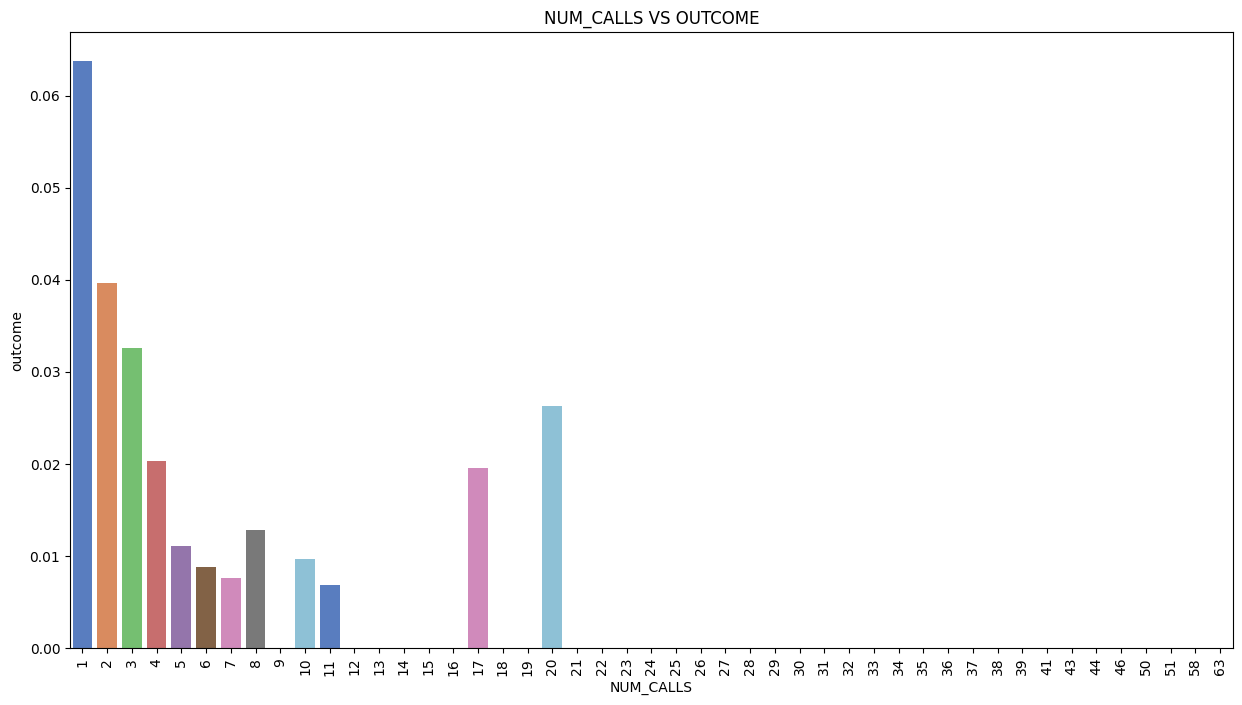

In [139]:
f=plt.figure(figsize=(15,8))
ss5=cls0_df.groupby(['num_calls'])[['y1']].mean()
ss5.reset_index(inplace=True)
sns.barplot(x='num_calls',y='y1',data=ss5,palette='muted')
plt.title('NUM_CALLS VS OUTCOME')
plt.xlabel('NUM_CALLS')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN this cluster,max number of calls made was 1.

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\597554057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mon',y='y1',data=ss6,palette='muted')


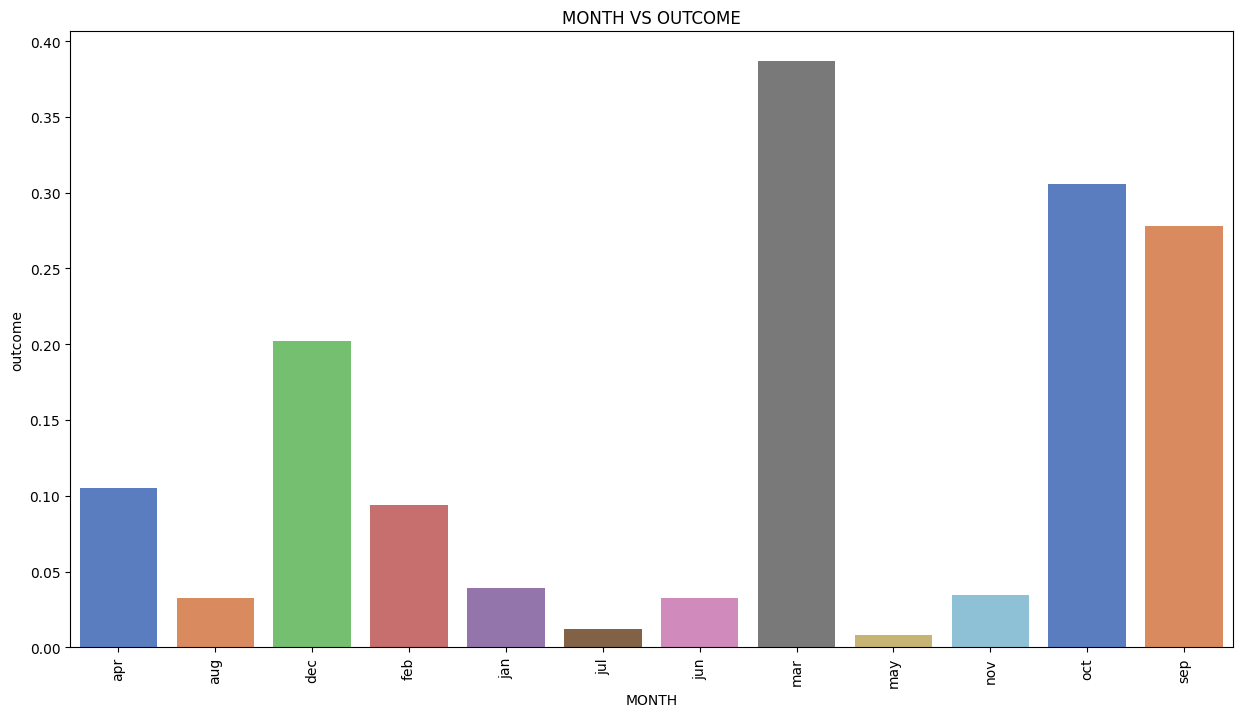

In [140]:
f=plt.figure(figsize=(15,8))
ss6=cls0_df.groupby(['mon'])[['y1']].mean()
ss6.reset_index(inplace=True)
sns.barplot(x='mon',y='y1',data=ss6,palette='muted')
plt.title('MONTH VS OUTCOME')
plt.xlabel('MONTH')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN THIS CLUSTER,MARCH,SEP,OCT and DEC MONTH MORE CONVERSION HAS BEEN MADE

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\2277217709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prev_outcome',y='y1',data=ss7,palette='Set1')


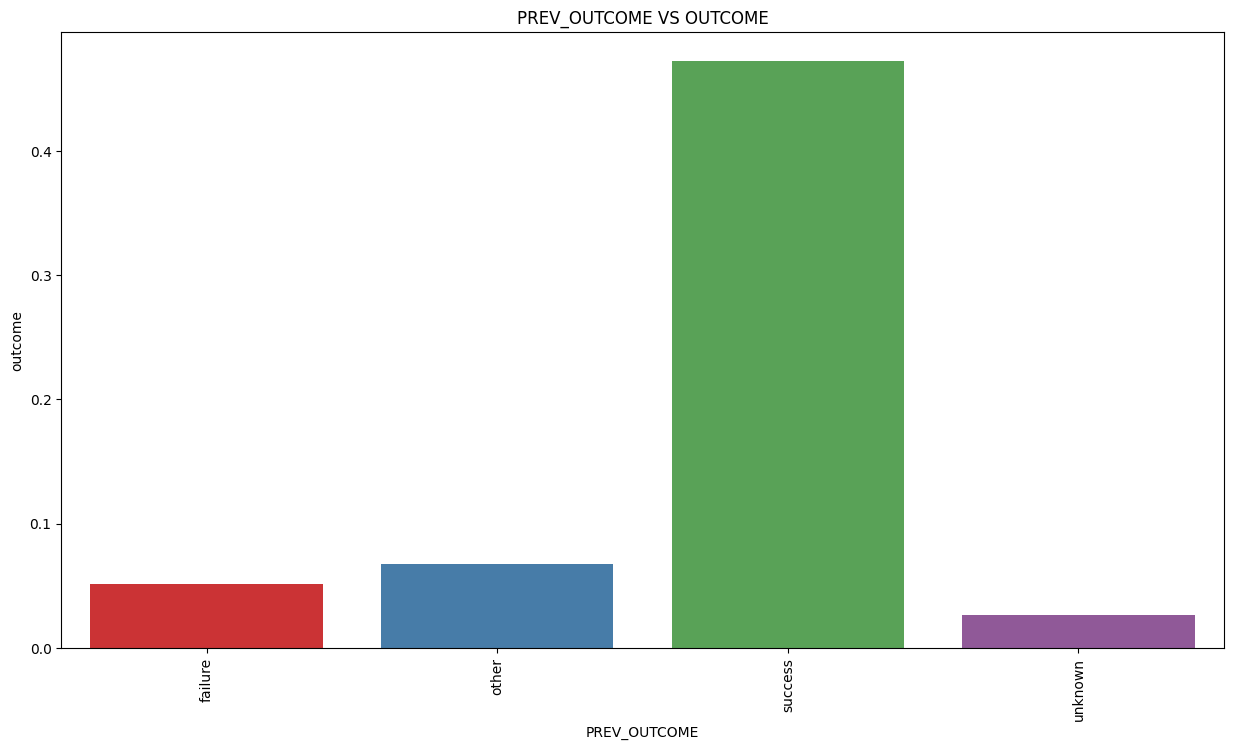

In [141]:
f=plt.figure(figsize=(15,8))
ss7=cls0_df.groupby(['prev_outcome'])[['y1']].mean()
ss7.reset_index(inplace=True)
sns.barplot(x='prev_outcome',y='y1',data=ss7,palette='Set1')
plt.title('PREV_OUTCOME VS OUTCOME')
plt.xlabel('PREV_OUTCOME')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN THIS CLUSTER,If the previous outcome of the call is success, then the customer is more likely to convert.

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3294065095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education_qual',y='y1',data=ss8,palette='muted')


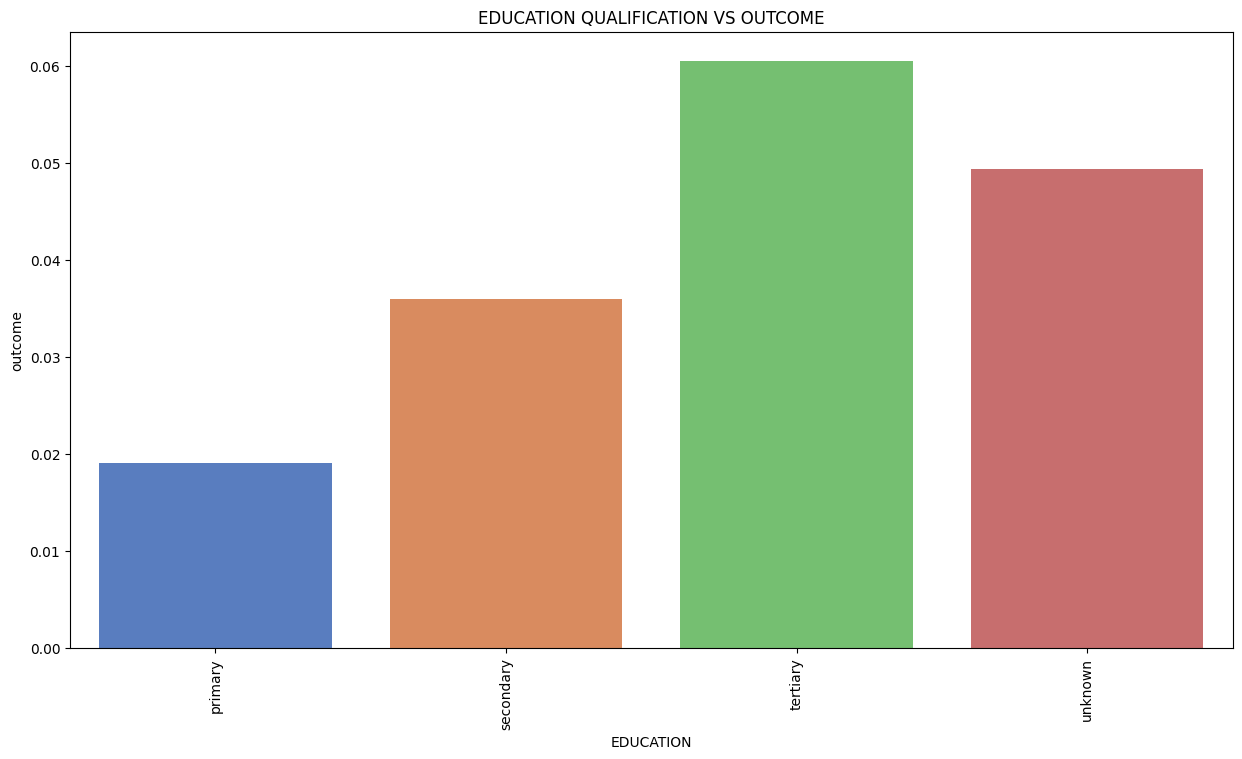

In [142]:
f=plt.figure(figsize=(15,8))
ss8=cls0_df.groupby(['education_qual'])[['y1']].mean()
ss8.reset_index(inplace=True)
sns.barplot(x='education_qual',y='y1',data=ss8,palette='muted')
plt.title('EDUCATION QUALIFICATION VS OUTCOME')
plt.xlabel('EDUCATION')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

IN THIS CLUSTER,PPL WHOSE EDUCATION STATUS TERTIARY WERE CONVERTED HIGHER COMPARED TO OTHERS

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3157722682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='y1',y='dur',data=ss9,palette='muted')


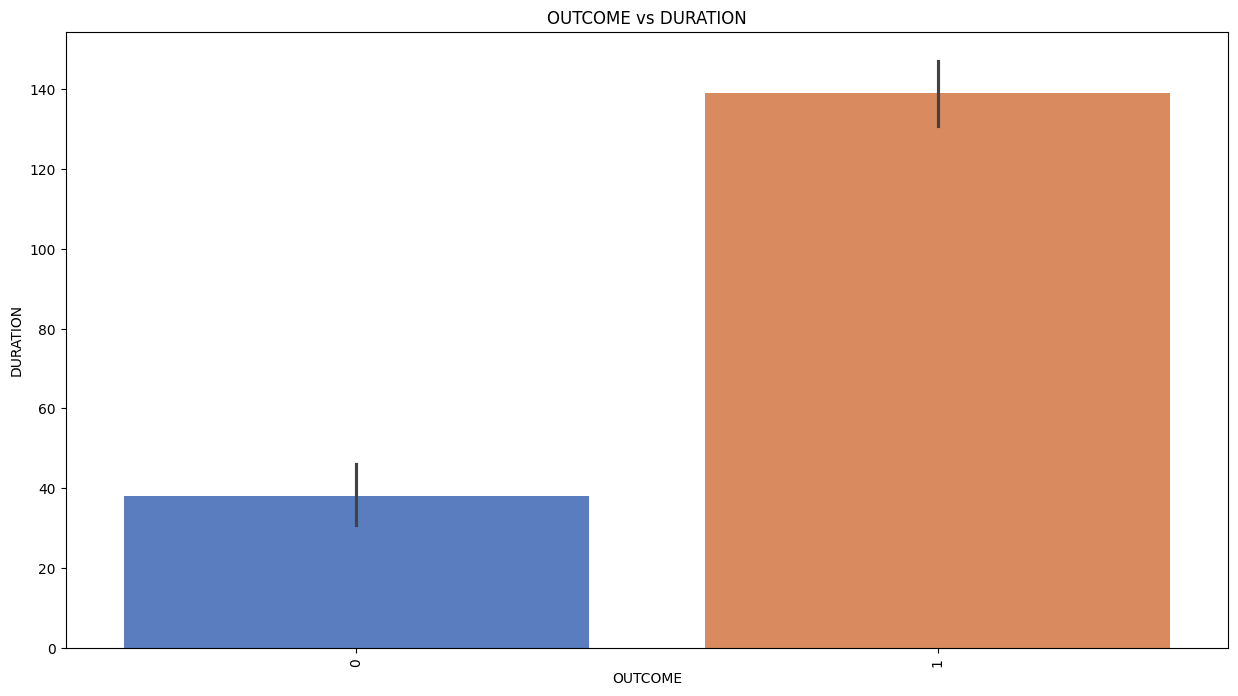

In [145]:
f=plt.figure(figsize=(15,8))
ss9=cls0_df.groupby(['dur'])[['y1']].max()
ss9.reset_index(inplace=True)
sns.barplot(x='y1',y='dur',data=ss9,palette='muted')
plt.title('OUTCOME vs DURATION')
plt.xlabel('OUTCOME')
plt.ylabel('DURATION')
plt.xticks(rotation=90)
plt.show()

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\1640442322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day',y='y1',data=ss10,palette='muted')


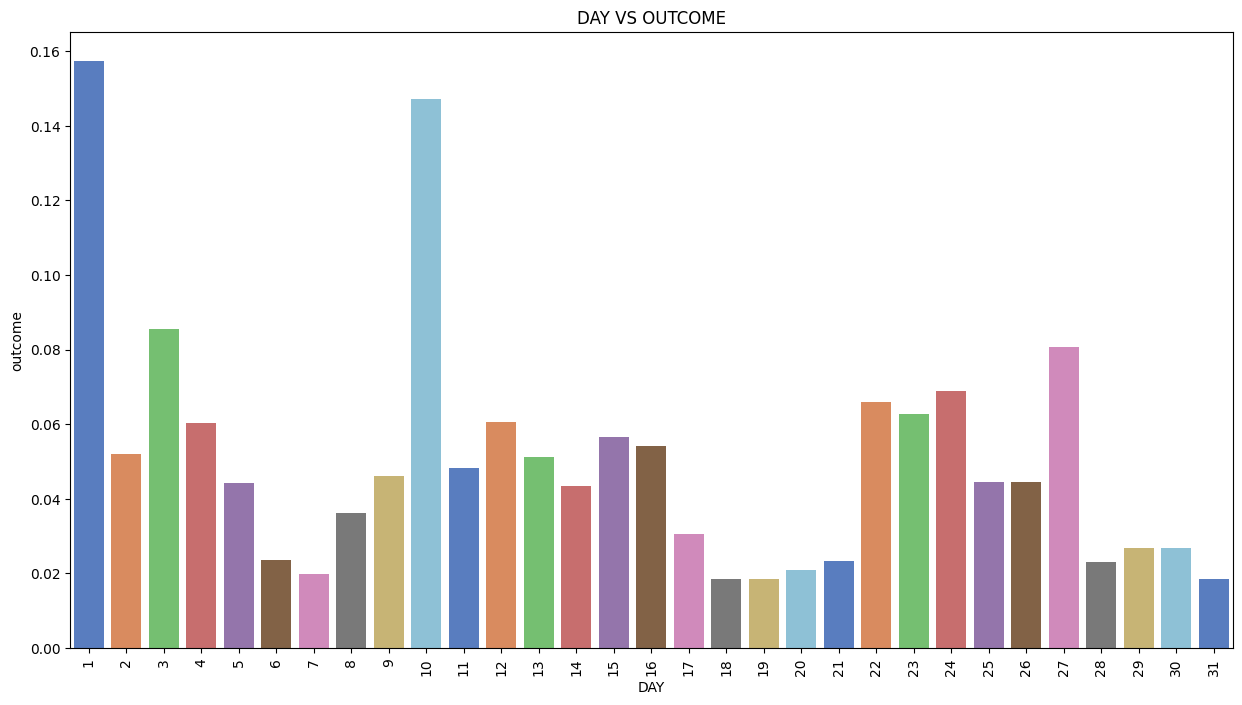

In [146]:
f=plt.figure(figsize=(15,8))
ss10=cls0_df.groupby(['day'])[['y1']].mean()
ss6.reset_index(inplace=True)
sns.barplot(x='day',y='y1',data=ss10,palette='muted')
plt.title('DAY VS OUTCOME')
plt.xlabel('DAY')
plt.ylabel('outcome')
plt.xticks(rotation=90)
plt.show()

In [421]:
cls1_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Cluster,y1
27729,59,management,married,tertiary,cellular,28,jan,59,1,failure,no,1,0
27730,40,management,married,tertiary,cellular,28,jan,260,1,failure,no,1,0
27739,42,unemployed,divorced,secondary,cellular,28,jan,97,1,failure,no,1,0
27740,43,technician,divorced,secondary,cellular,28,jan,130,1,failure,no,1,0
27742,59,services,divorced,secondary,cellular,28,jan,602,1,other,yes,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44246,27,admin.,single,secondary,cellular,21,jul,104,1,failure,no,1,0
44249,35,admin.,single,secondary,cellular,21,jul,143,1,other,yes,1,1
44259,39,blue-collar,married,primary,unknown,22,jul,23,1,failure,no,1,0
44293,32,admin.,single,secondary,cellular,26,jul,109,3,failure,no,1,0


In [147]:
def clusf(i,df):
    f=plt.figure(figsize=(15,8))
    ss1=df.groupby([i])[['y1']].mean()
    ss1.reset_index(inplace=True)
    sns.barplot(x=i,y='y1',data=ss1,palette='viridis')
    plt.title(f'{i} VS OUTCOME')
    plt.xlabel(f'{i}')
    plt.ylabel('outcome')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


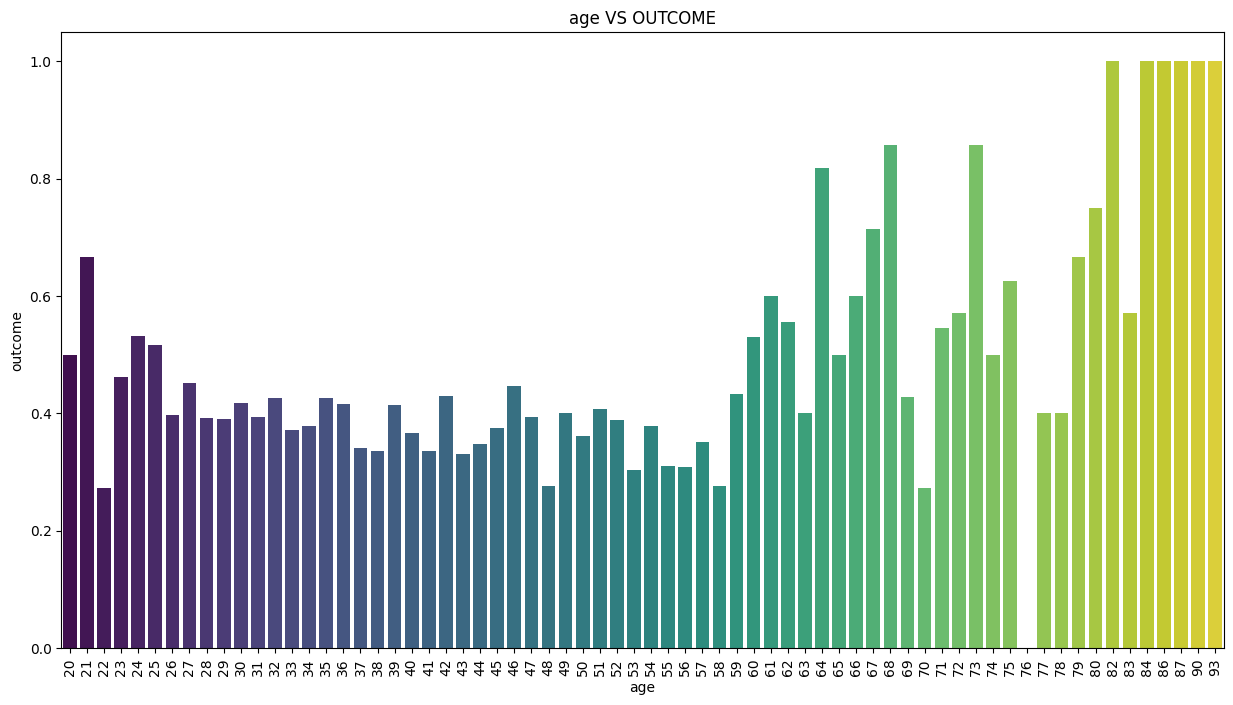

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


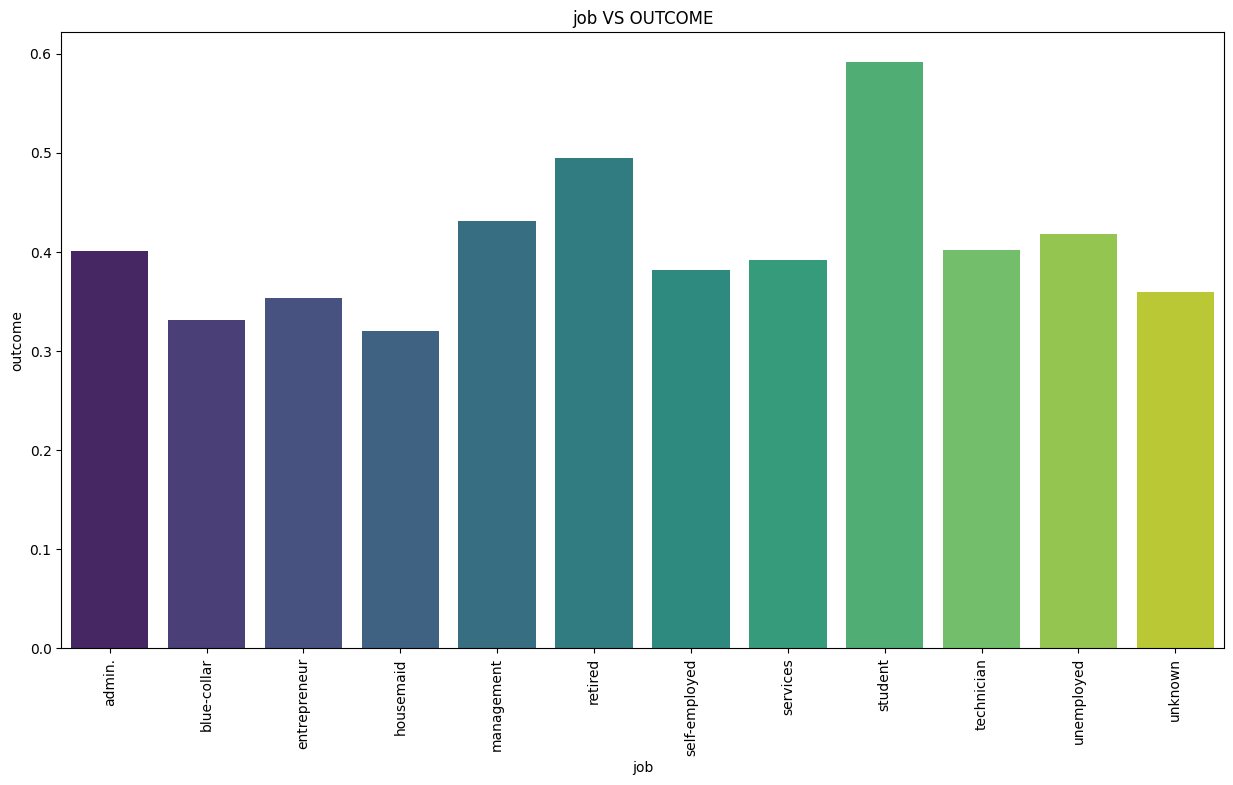

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


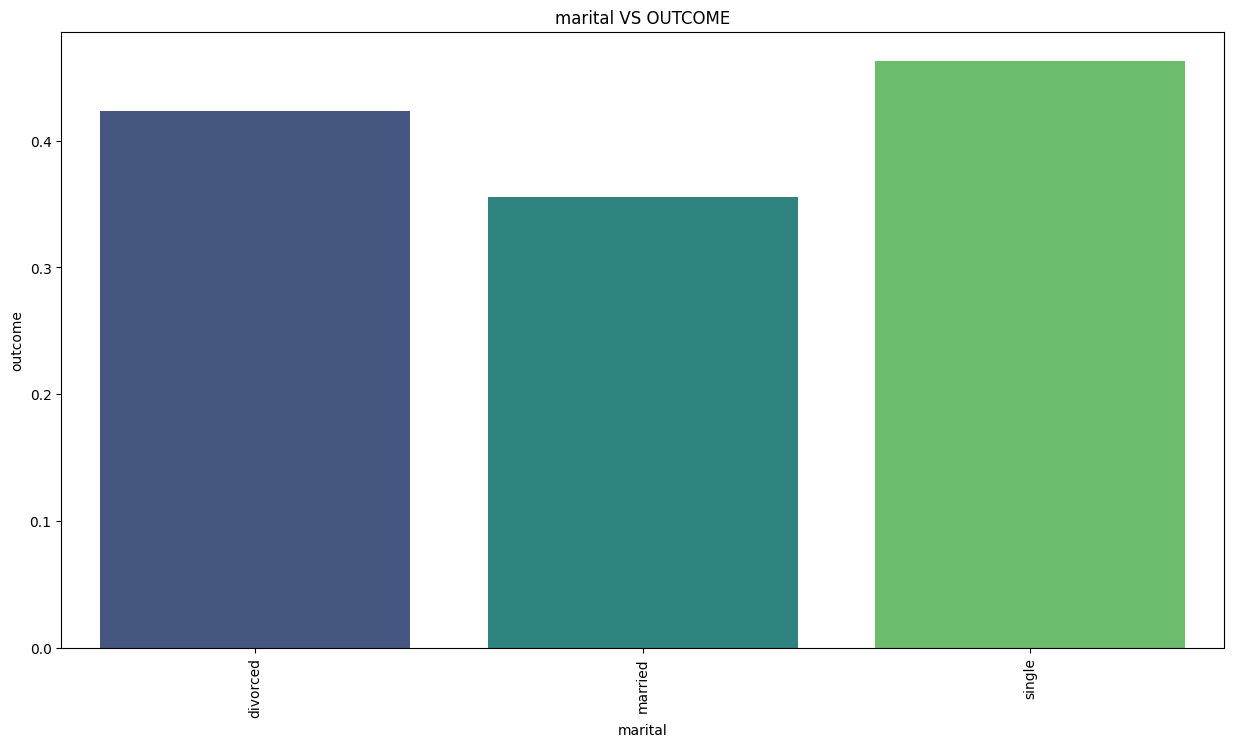

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


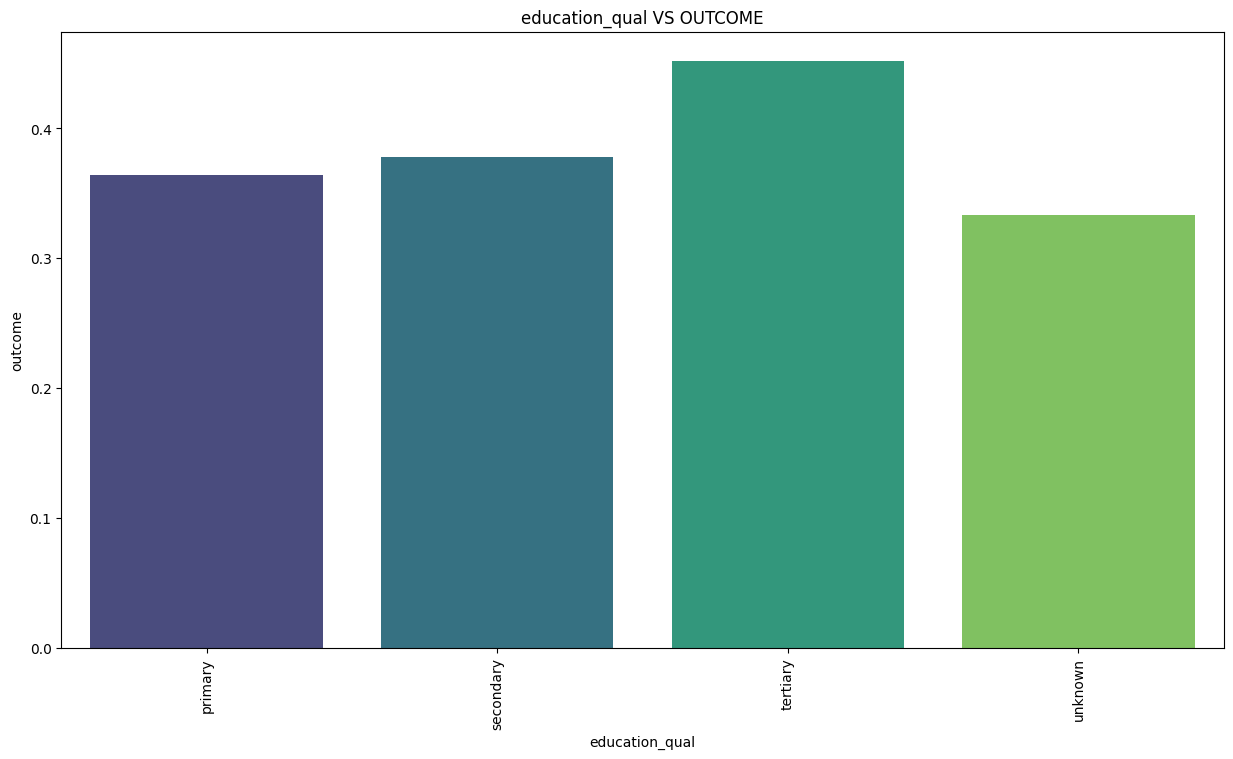

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


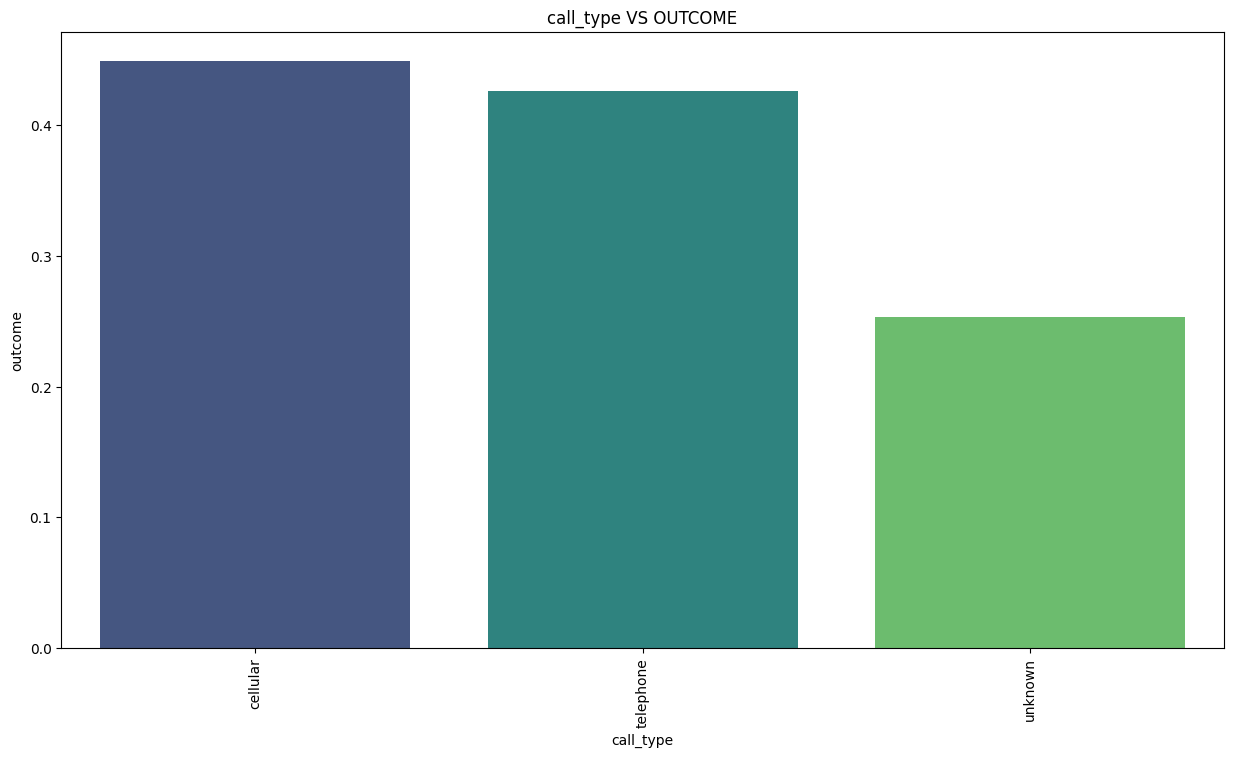

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


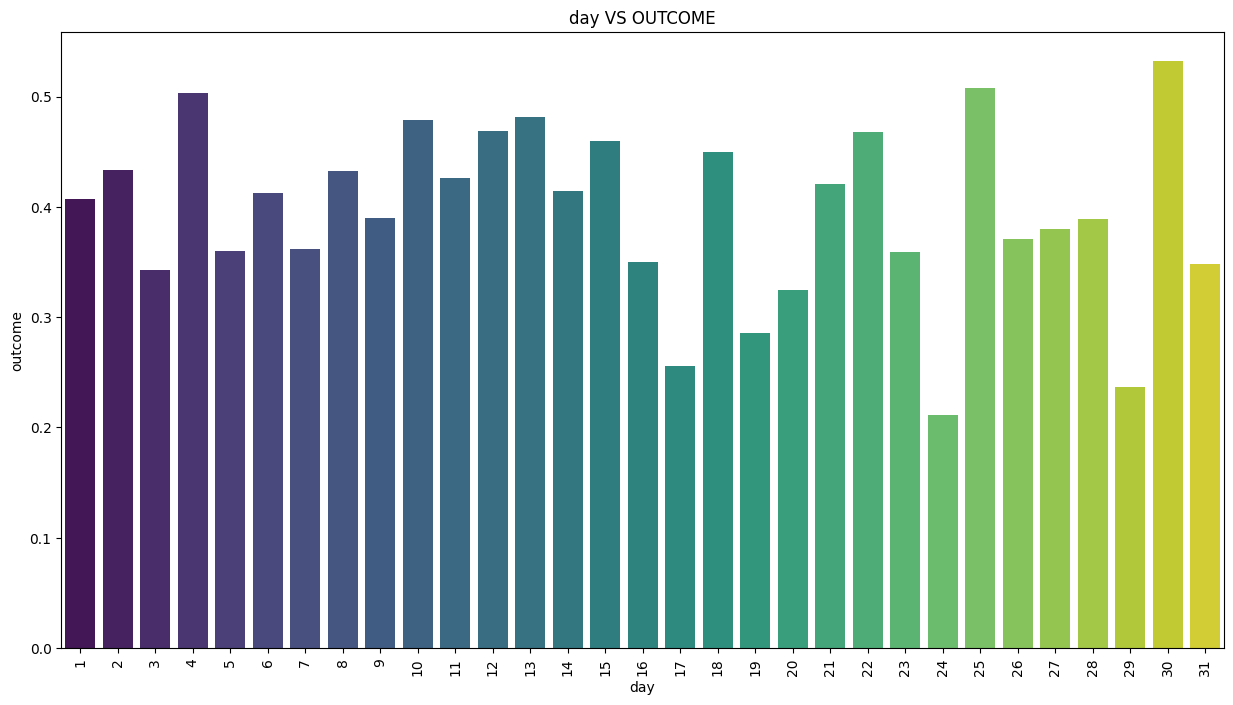

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


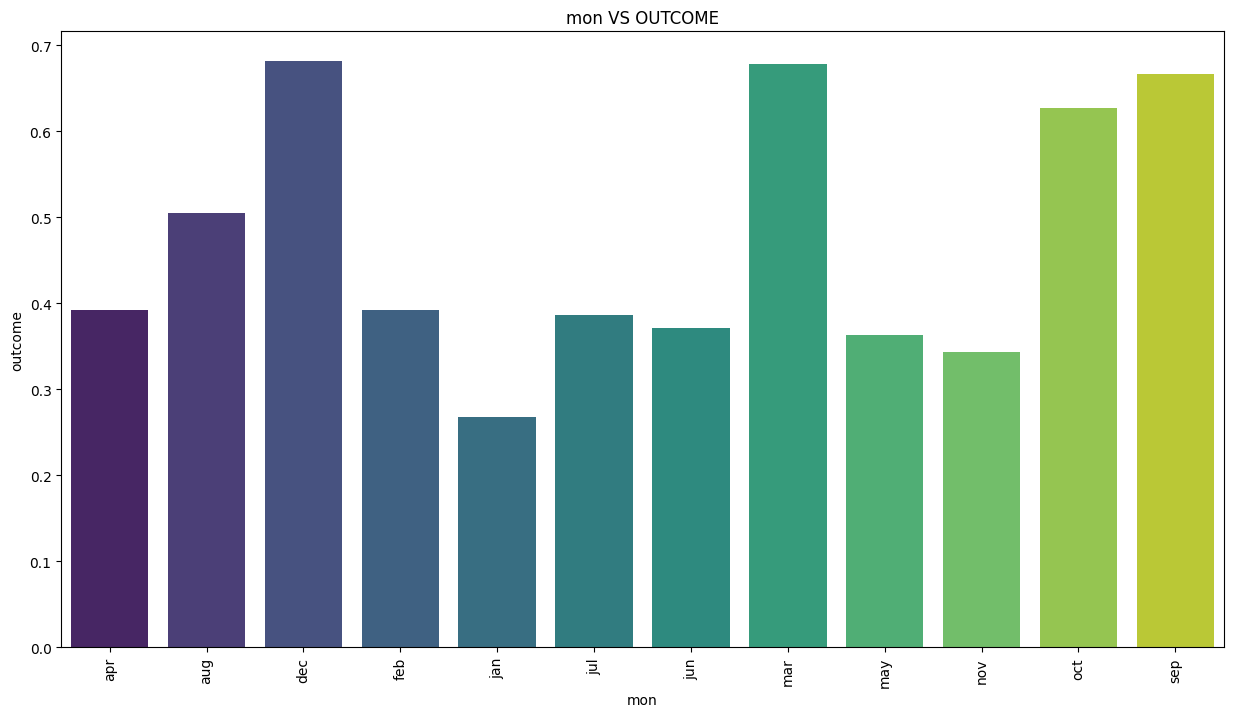

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


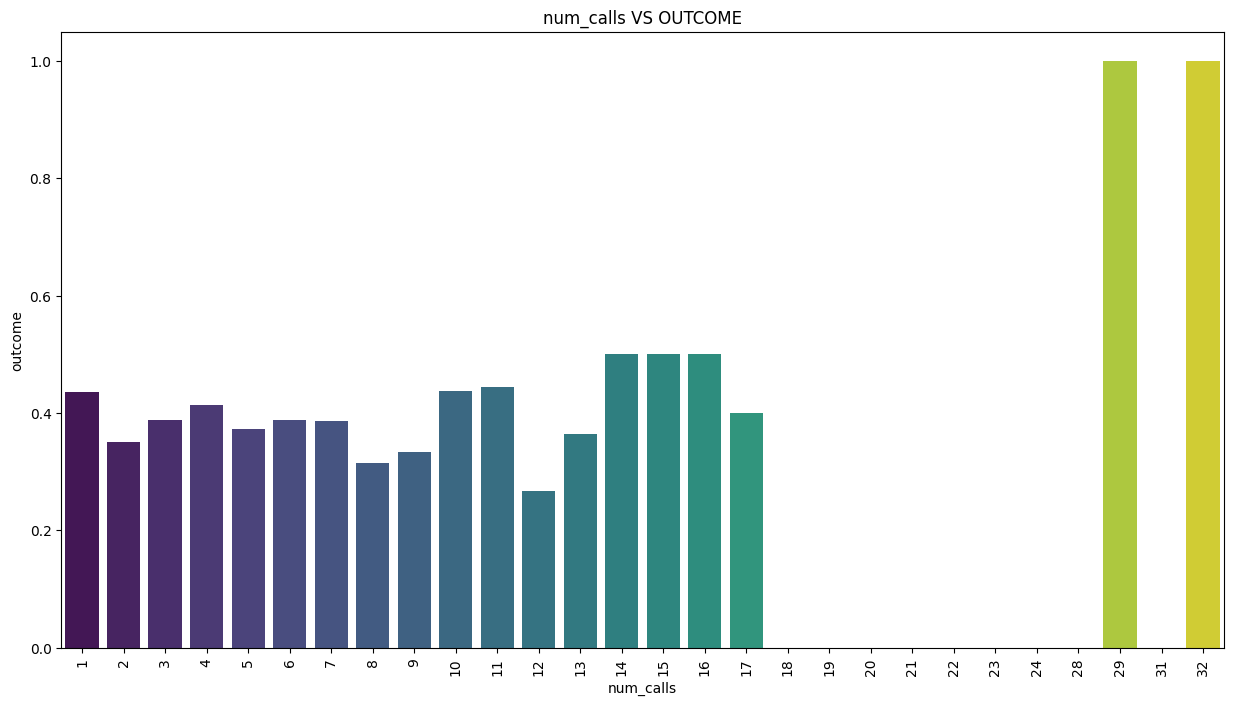

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


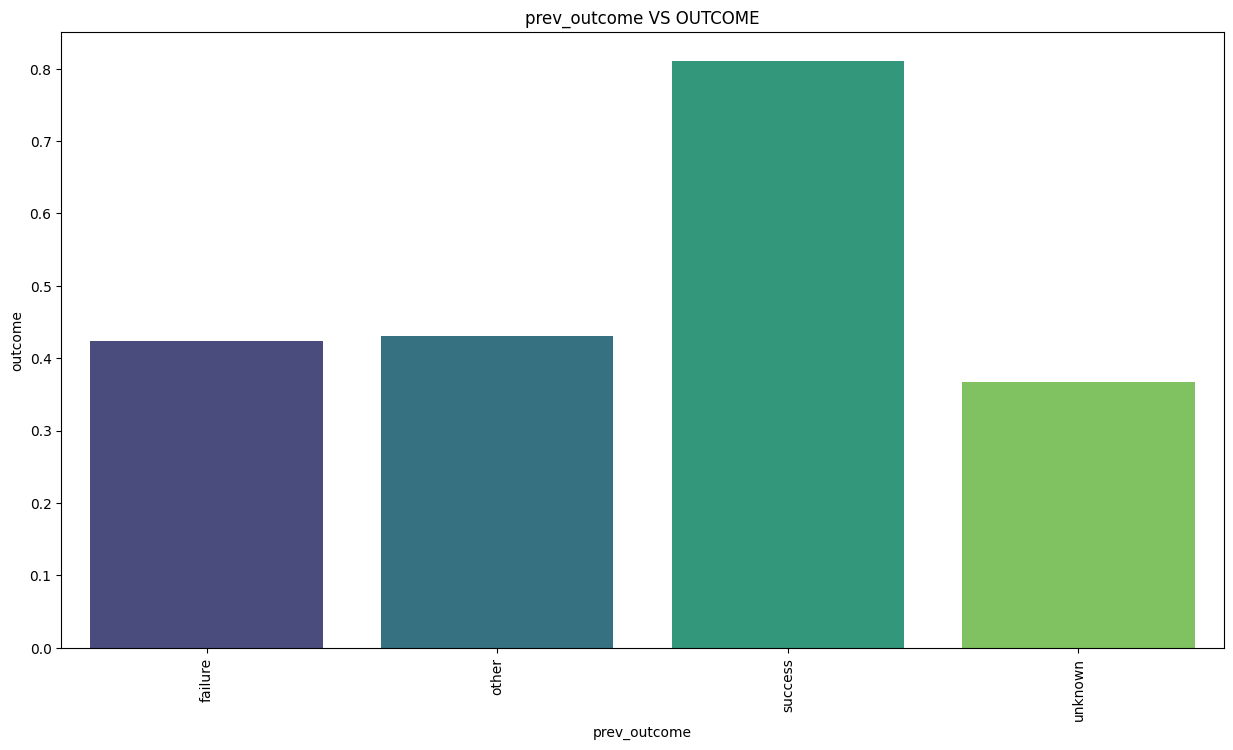

In [148]:
col=['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon','num_calls', 'prev_outcome']

for i in col:
    clusf(i,cls1_df)
       

    

In [149]:
cls3_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Cluster,y1
37,53,technician,married,secondary,unknown,5,may,1666,1,unknown,no,3,0
43,54,retired,married,secondary,unknown,5,may,1492,1,unknown,no,3,0
59,46,services,married,primary,unknown,5,may,1778,1,unknown,no,3,0
86,56,admin.,married,secondary,unknown,5,may,1467,1,unknown,yes,3,1
87,41,technician,married,secondary,unknown,5,may,1389,1,unknown,yes,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45016,40,management,married,tertiary,cellular,14,oct,1410,3,unknown,no,3,0
45031,42,unemployed,married,secondary,cellular,15,oct,1176,3,success,yes,3,1
45199,34,blue-collar,single,secondary,cellular,16,nov,1166,3,other,no,3,0
45200,38,technician,married,secondary,cellular,16,nov,1556,4,unknown,yes,3,1


C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


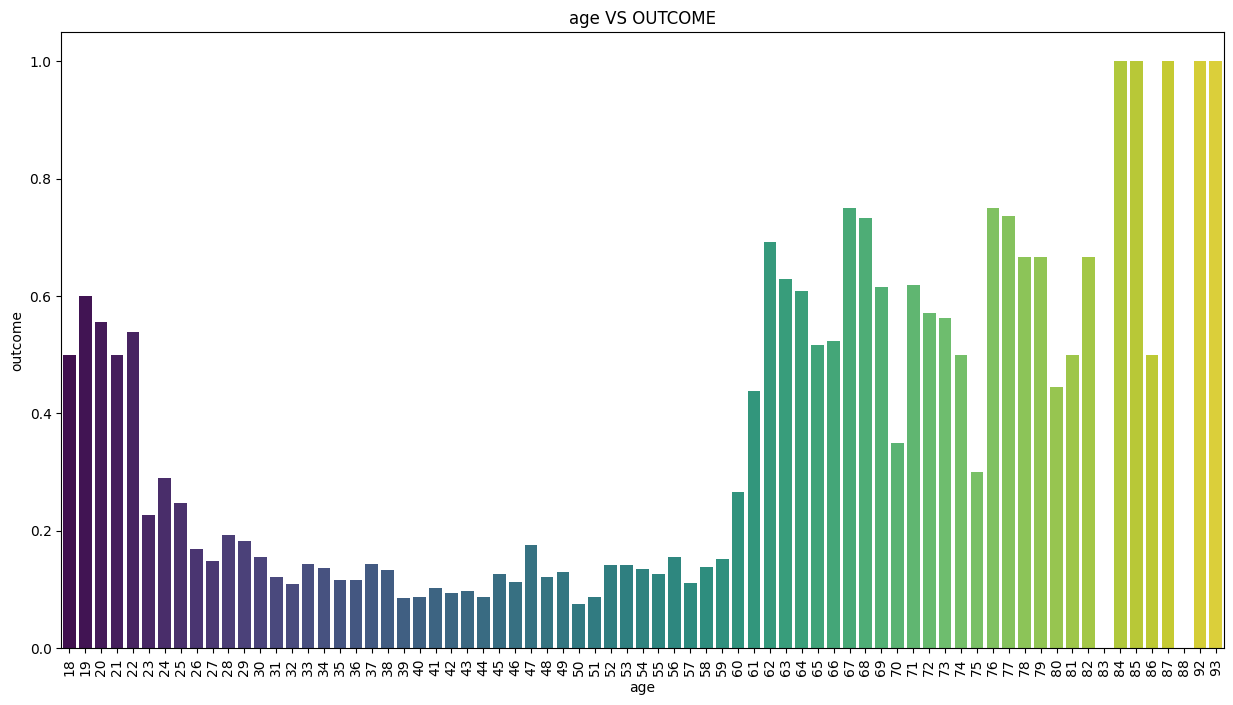

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


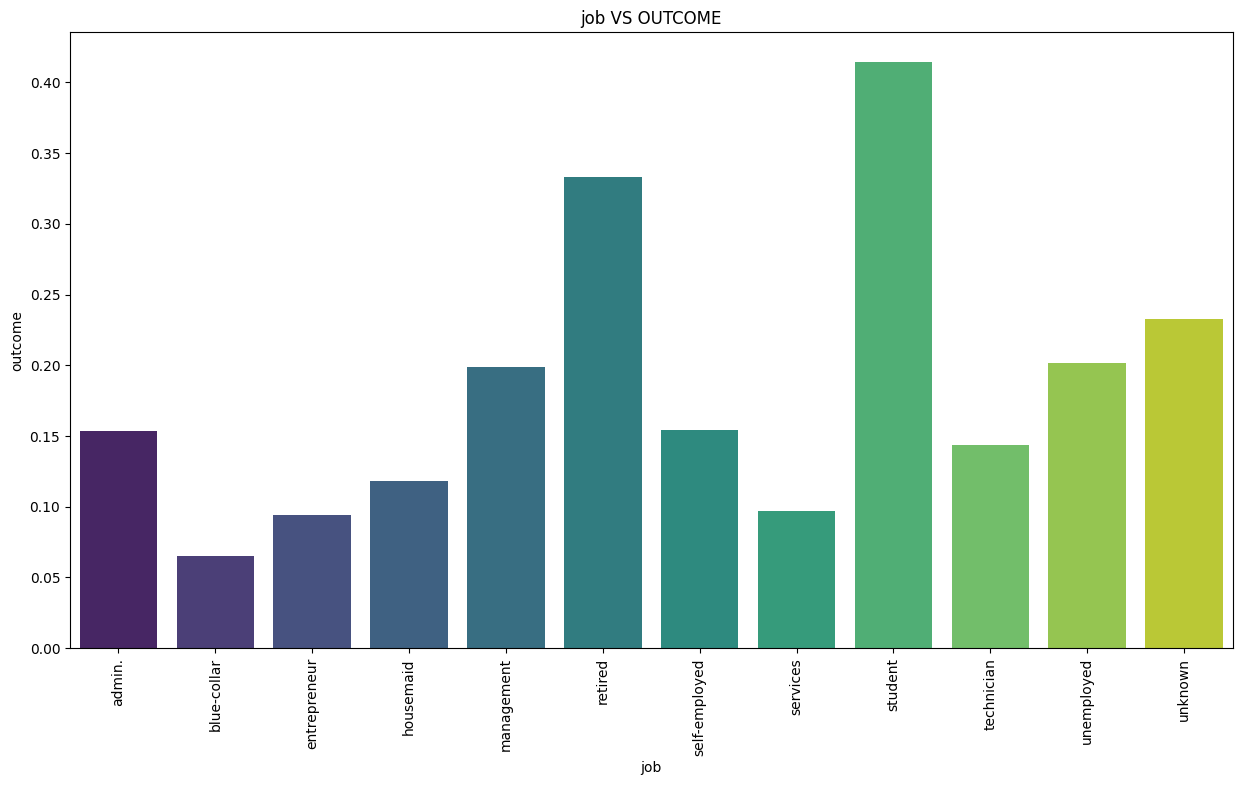

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


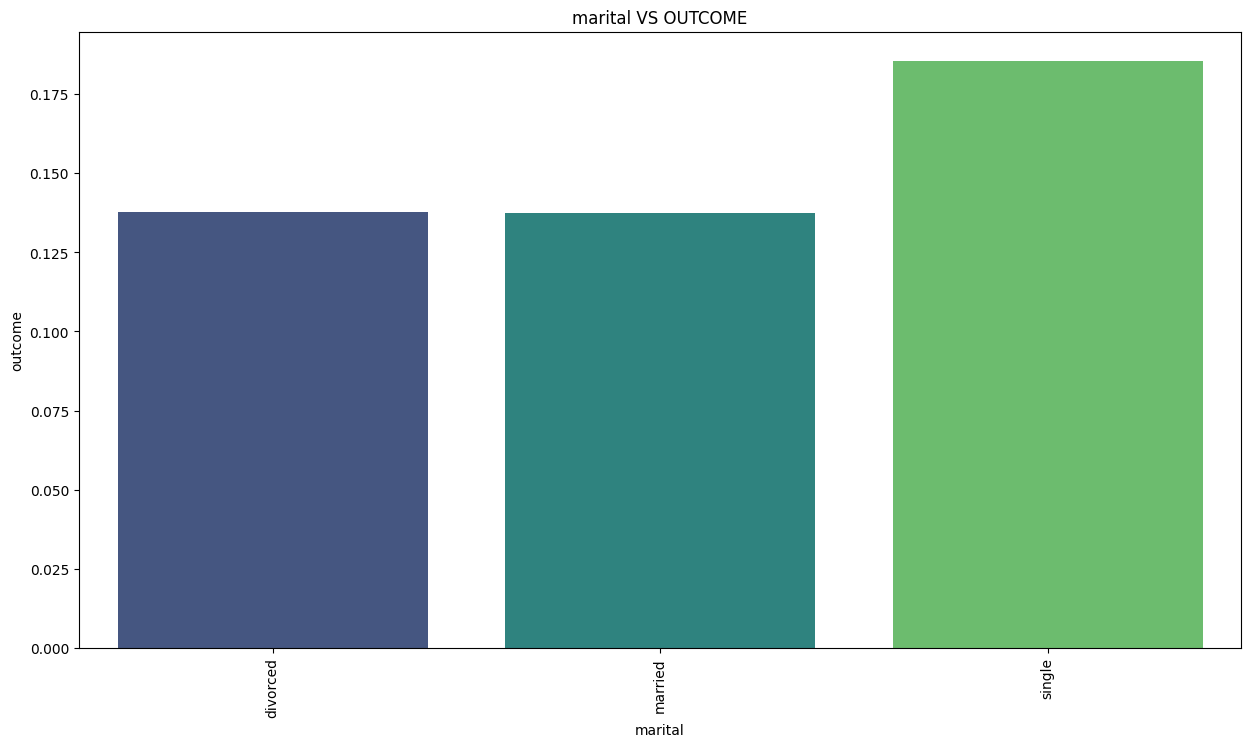

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


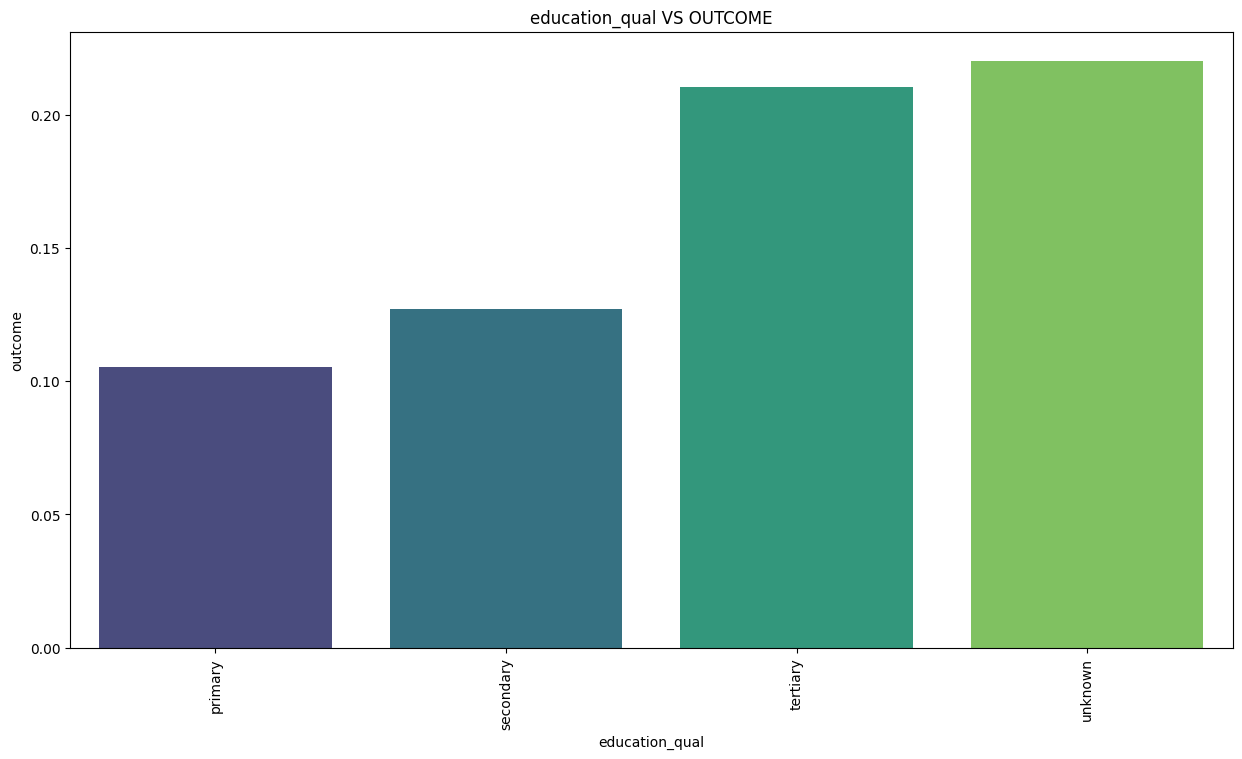

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


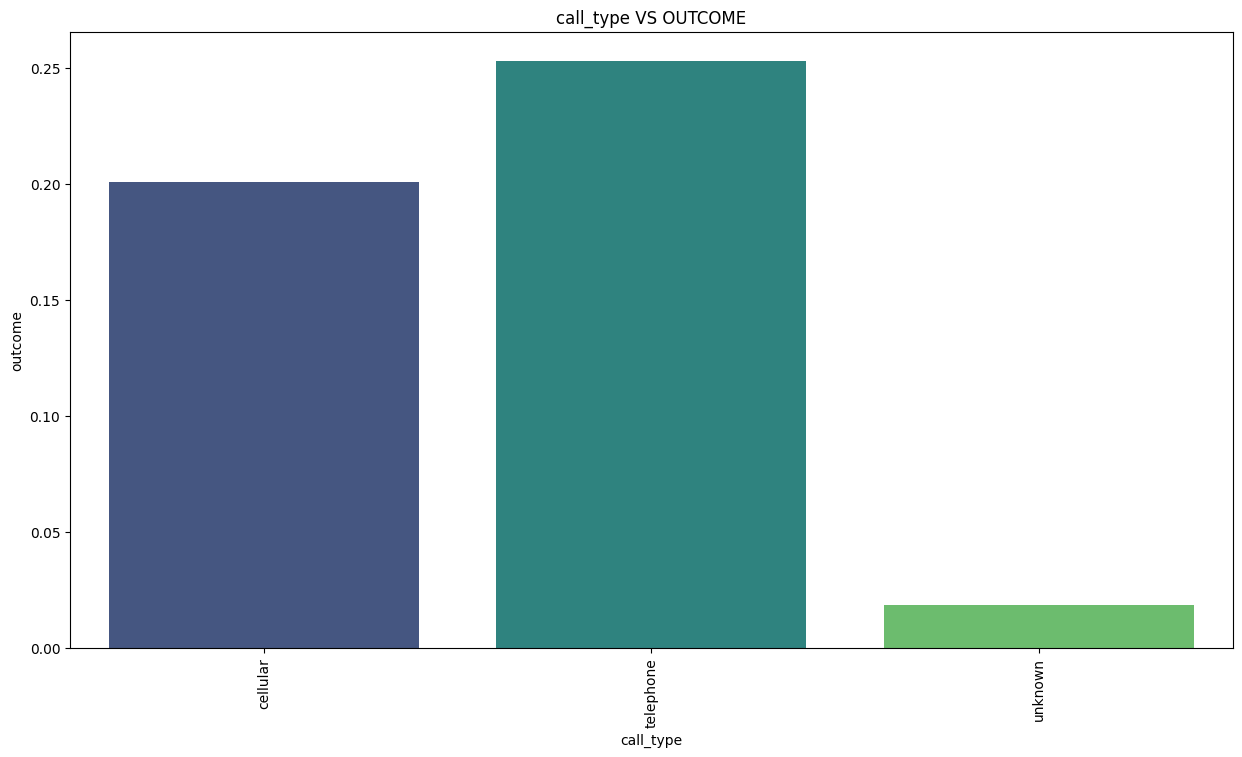

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


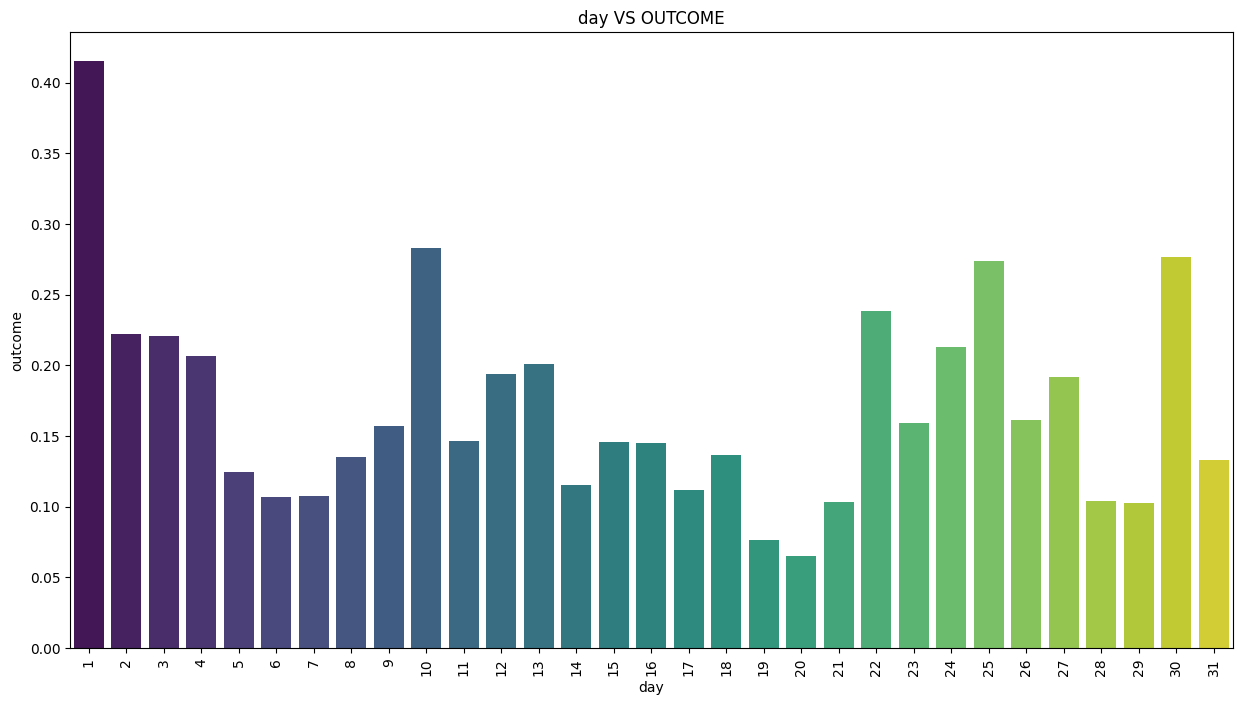

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


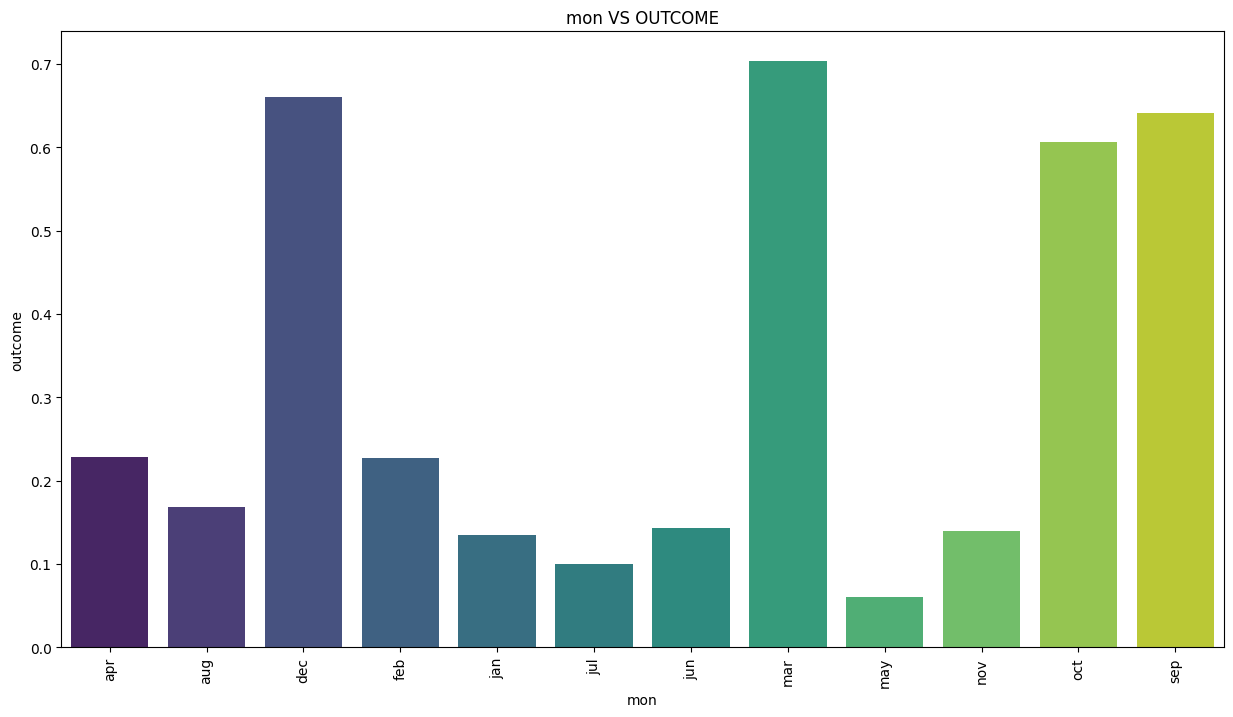

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


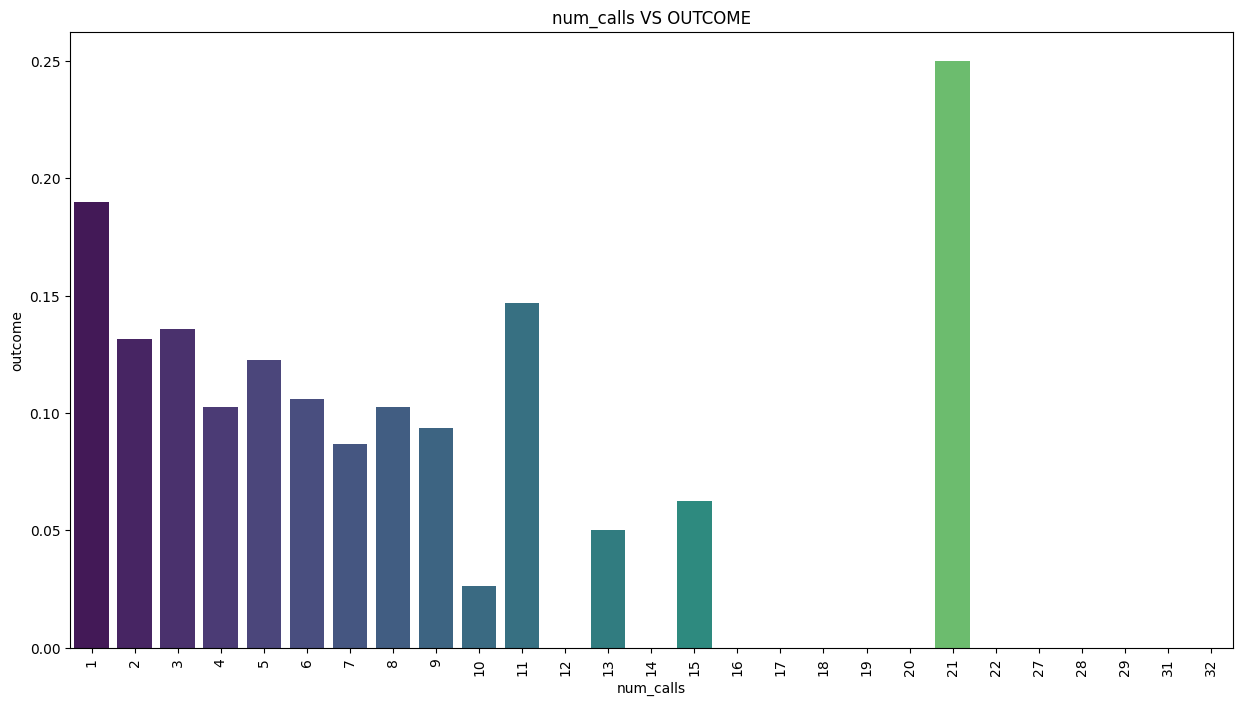

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


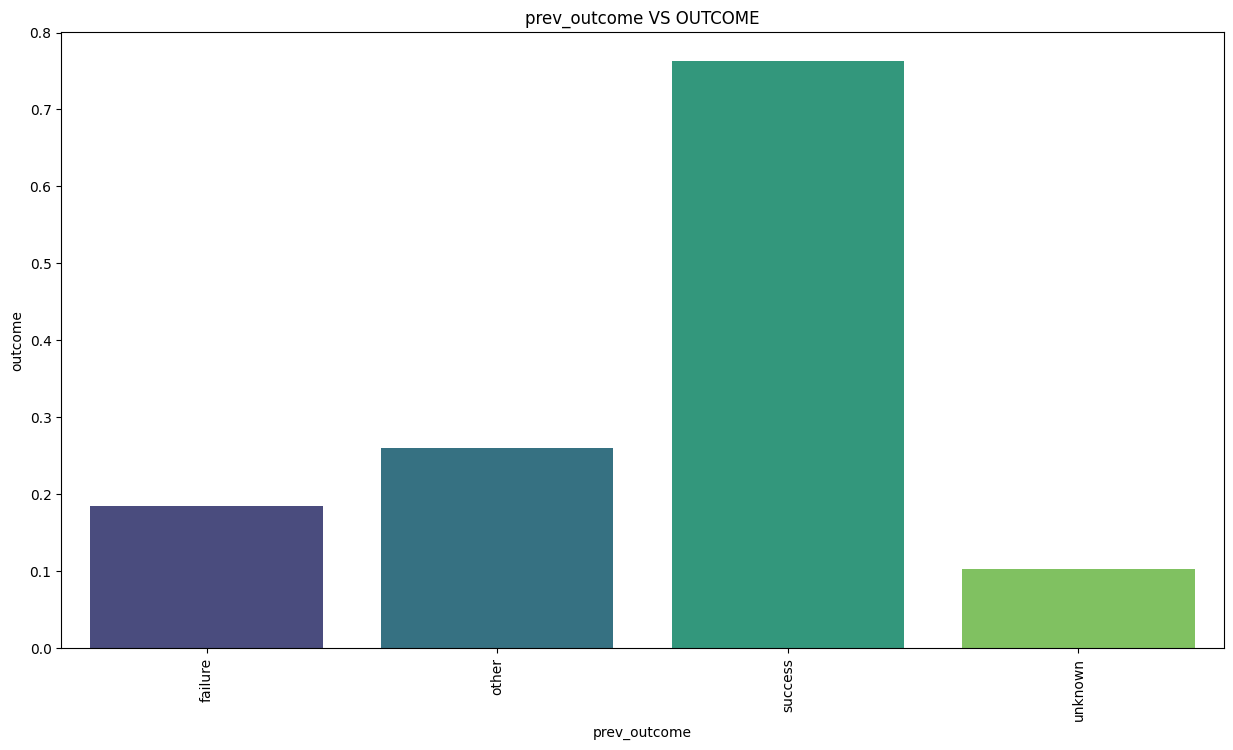

In [150]:
col=['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon','num_calls', 'prev_outcome']

for i in col:
    clusf(i,cls2_df)

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


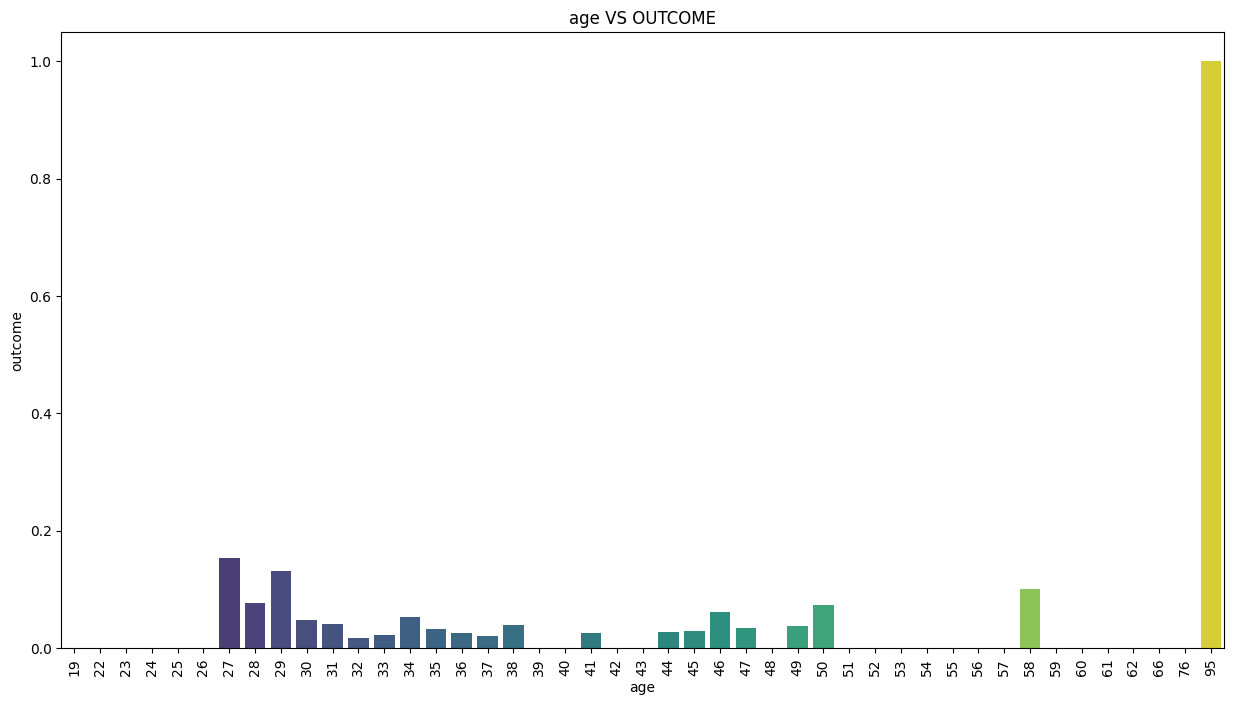

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


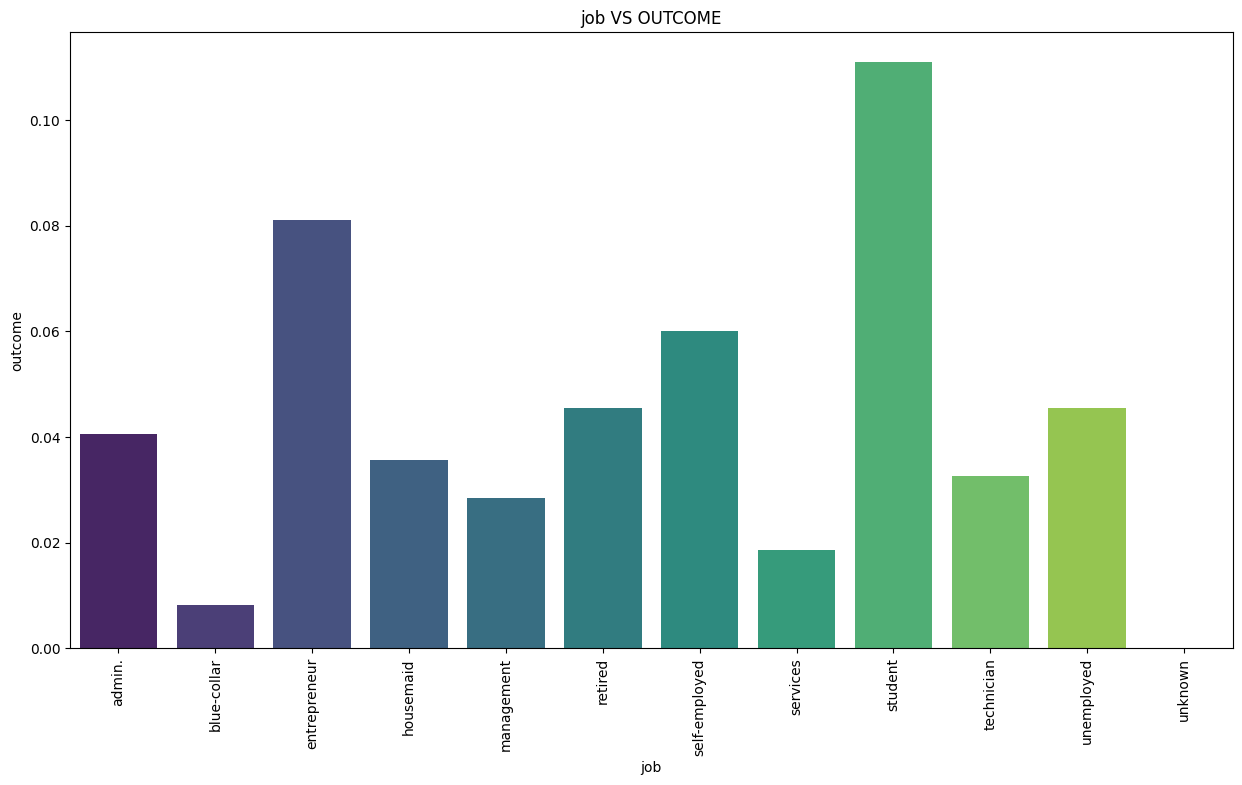

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


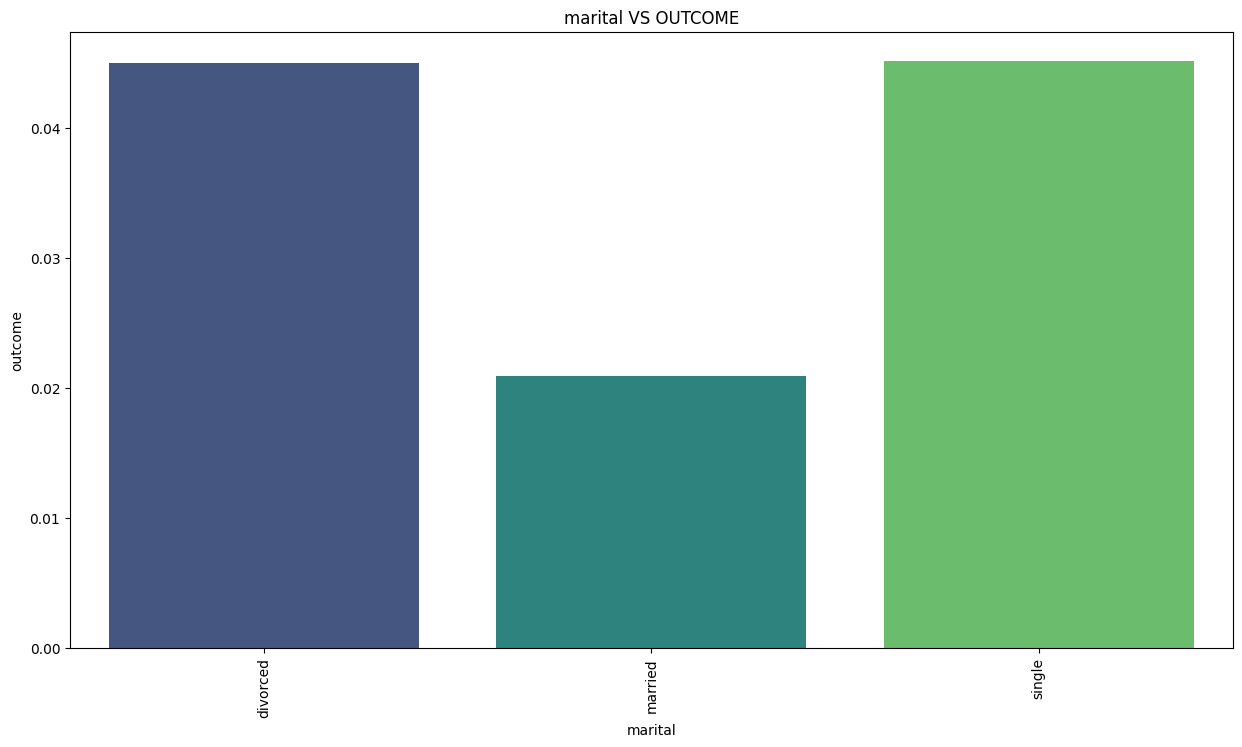

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


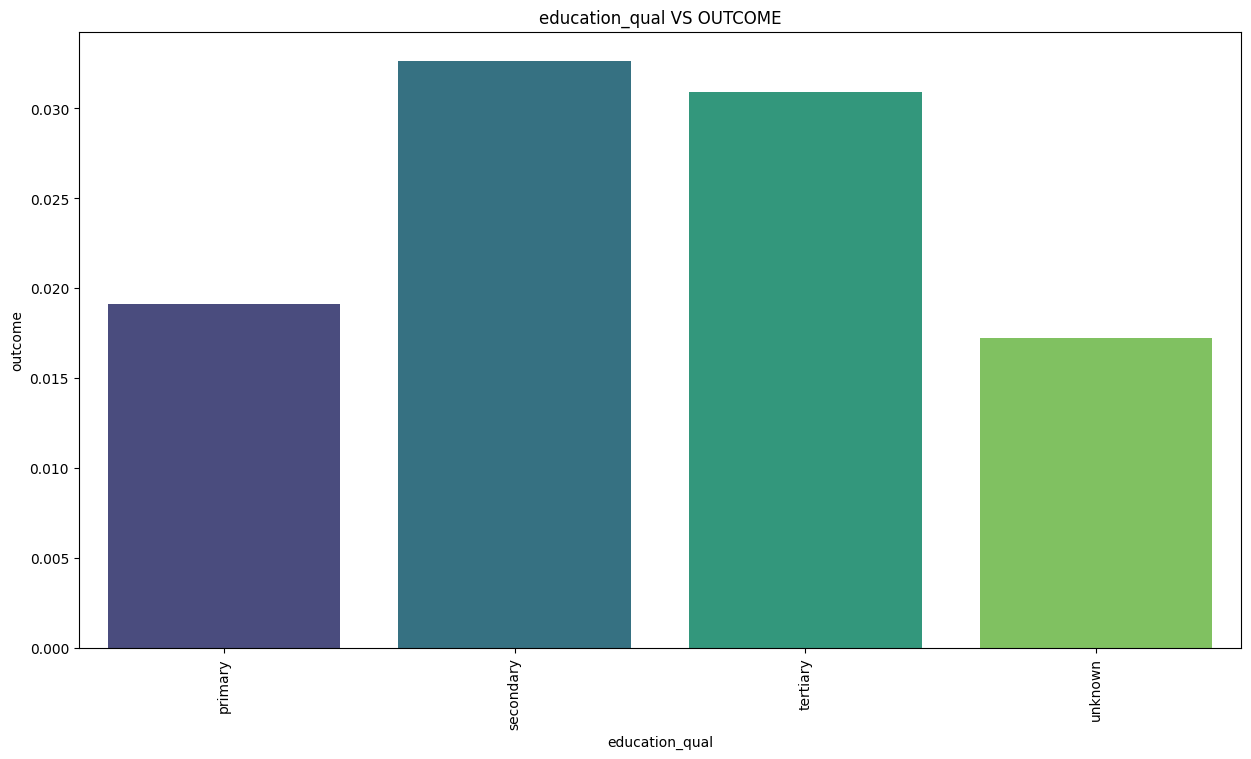

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


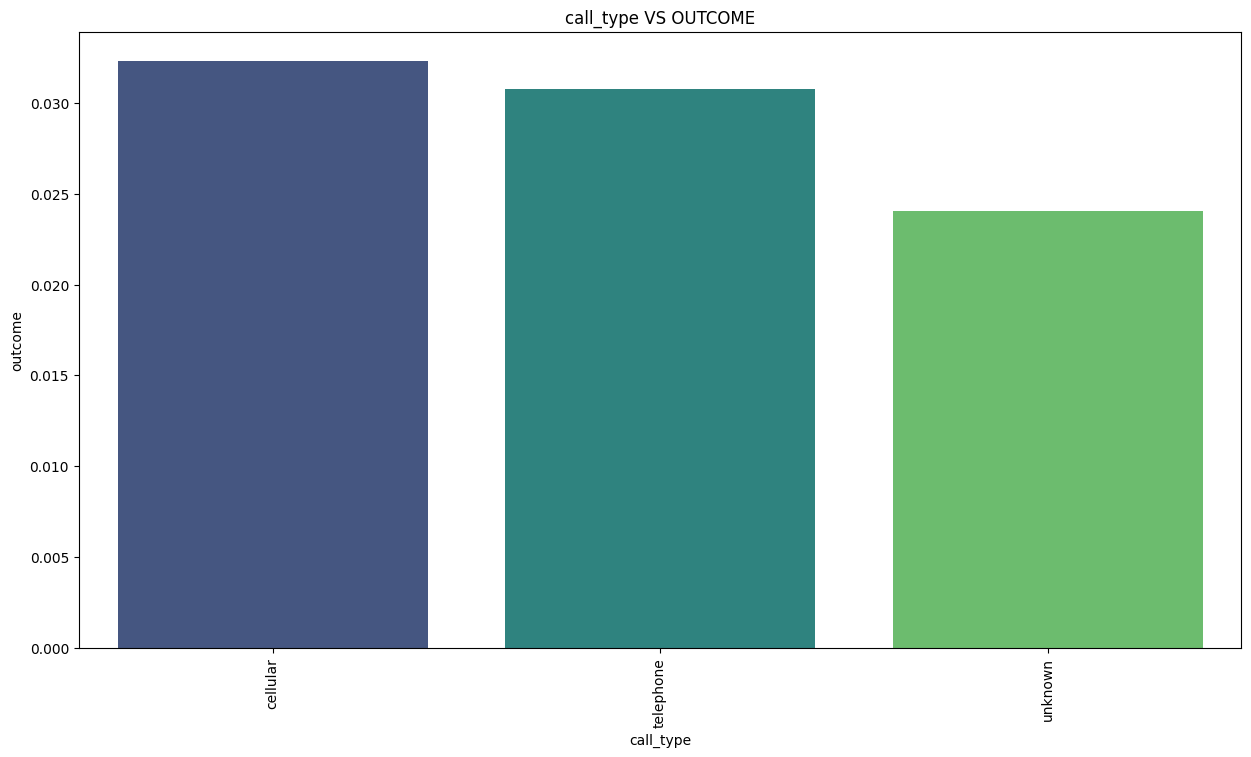

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


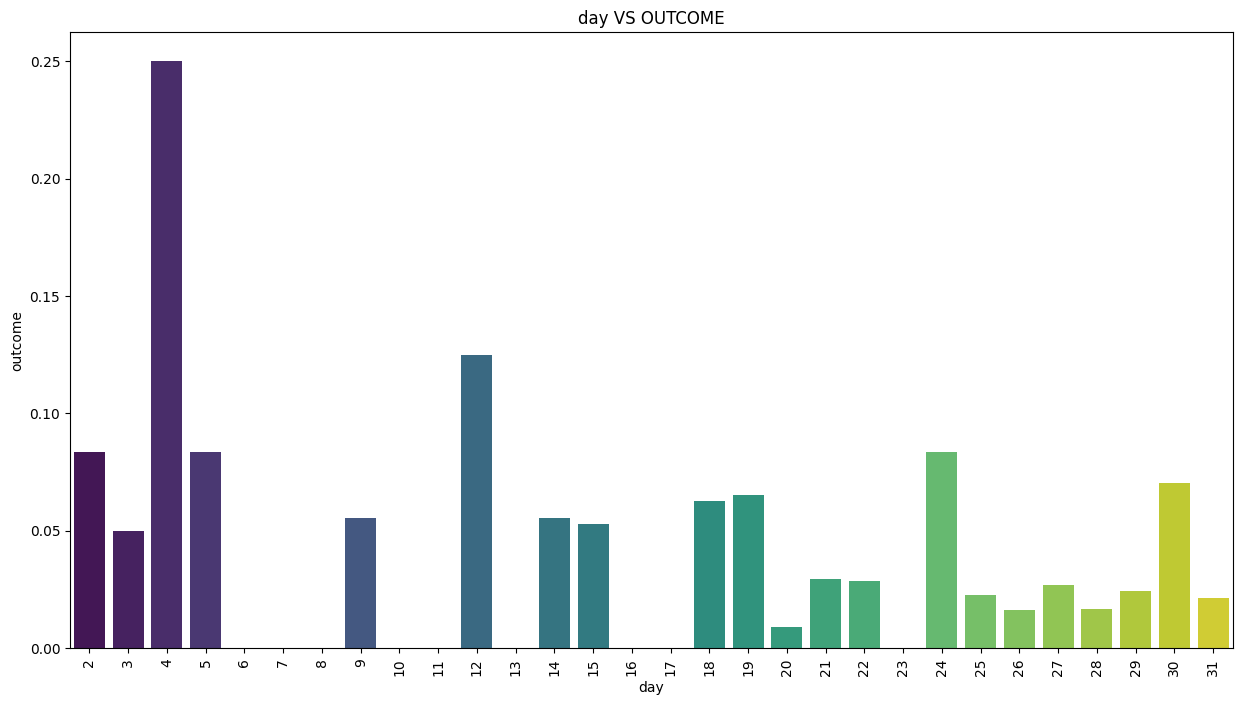

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


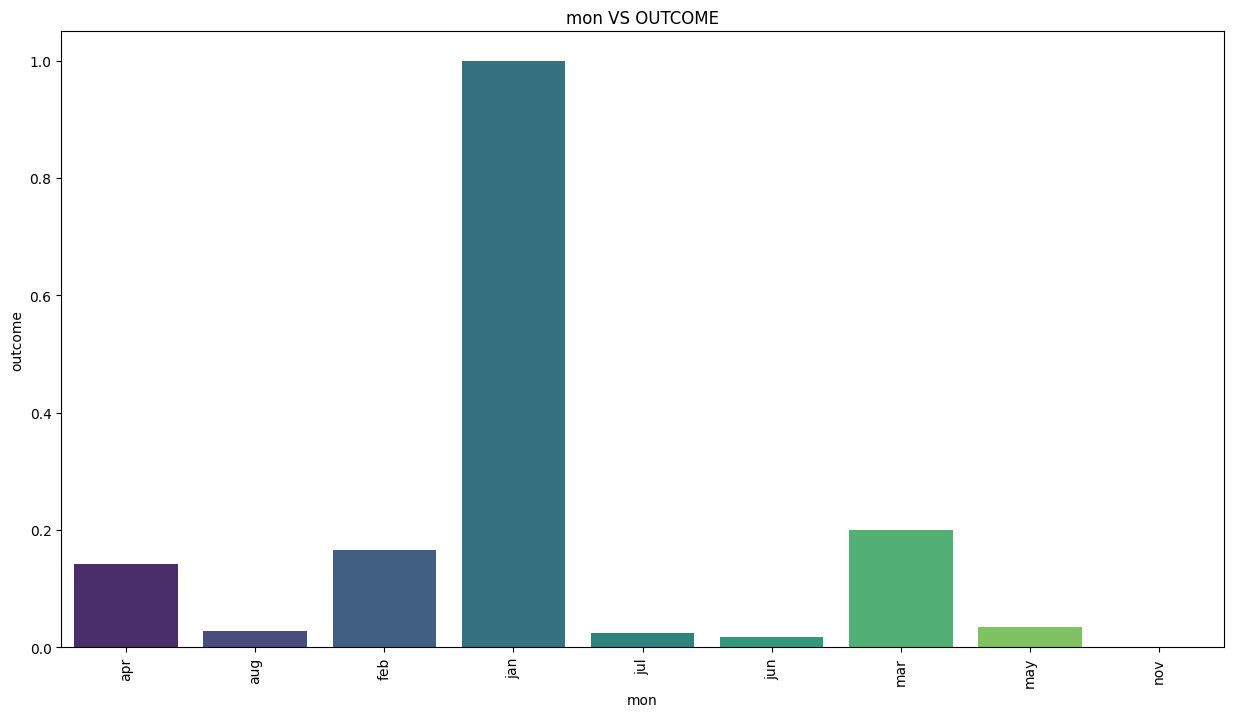

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


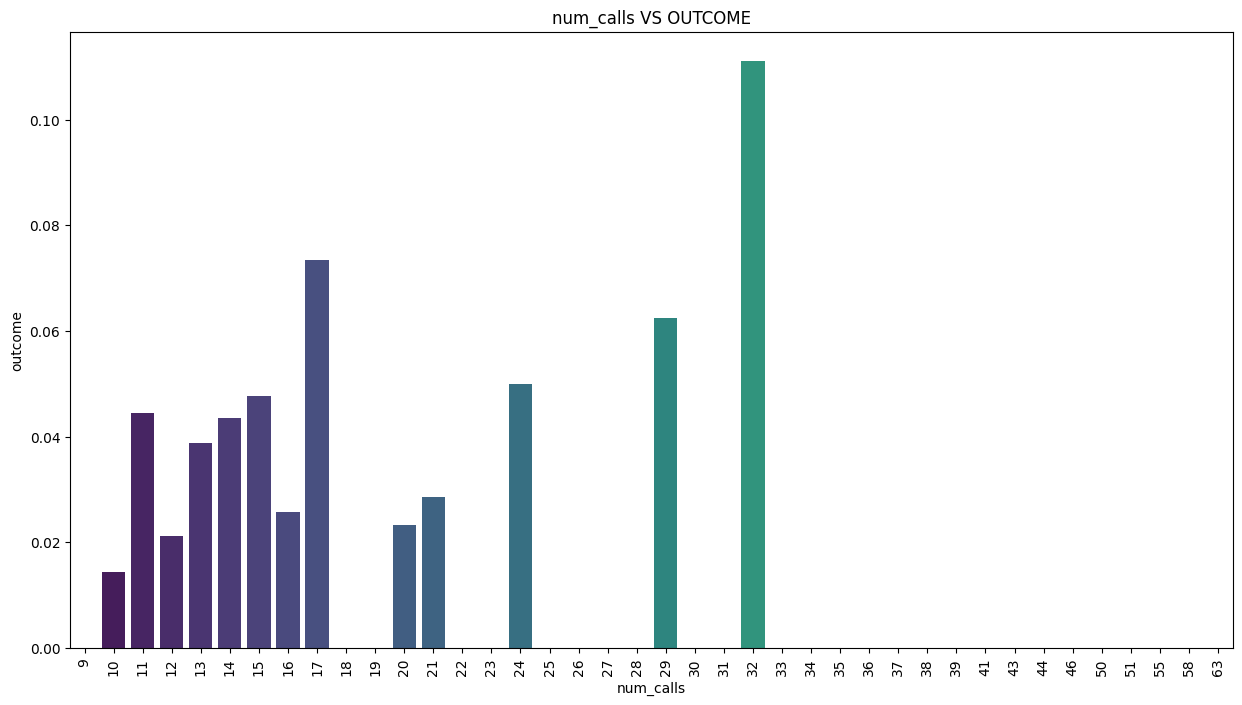

C:\Users\yaazhisai\AppData\Local\Temp\ipykernel_55908\3095818052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i,y='y1',data=ss1,palette='viridis')


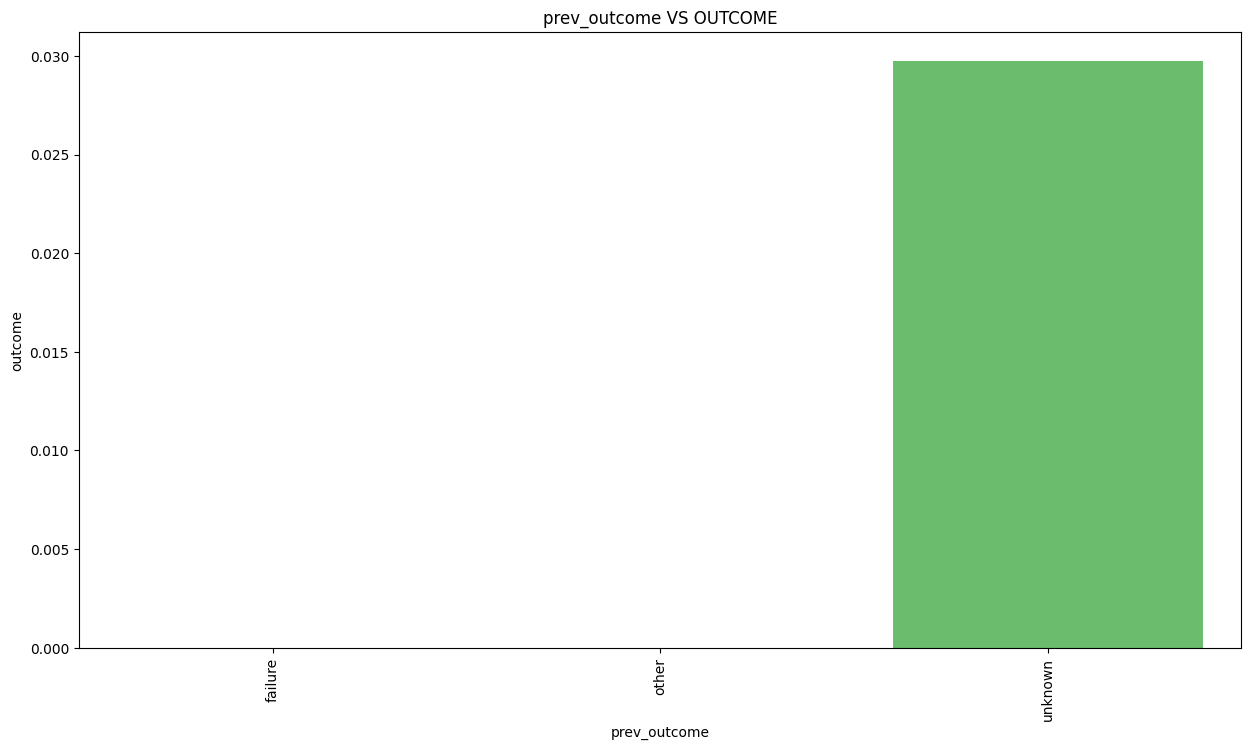

In [151]:
col=['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon','num_calls', 'prev_outcome']

for i in col:
    clusf(i,cls4_df)

In [152]:
cls4_df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome,Cluster,y1
2305,25,admin.,single,secondary,unknown,12,may,24,12,unknown,no,4,0
2626,31,technician,married,secondary,unknown,13,may,101,13,unknown,no,4,0
2686,31,services,married,secondary,unknown,13,may,133,12,unknown,no,4,0
2706,46,admin.,divorced,tertiary,unknown,13,may,69,19,unknown,no,4,0
2967,37,technician,married,tertiary,unknown,14,may,93,14,unknown,no,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40336,57,entrepreneur,married,tertiary,telephone,18,jun,390,15,unknown,no,4,0
42315,62,technician,married,secondary,telephone,16,nov,446,13,other,no,4,0
42817,45,management,single,tertiary,cellular,29,jan,479,11,unknown,yes,4,1
44231,32,entrepreneur,married,tertiary,cellular,19,jul,187,11,unknown,yes,4,1


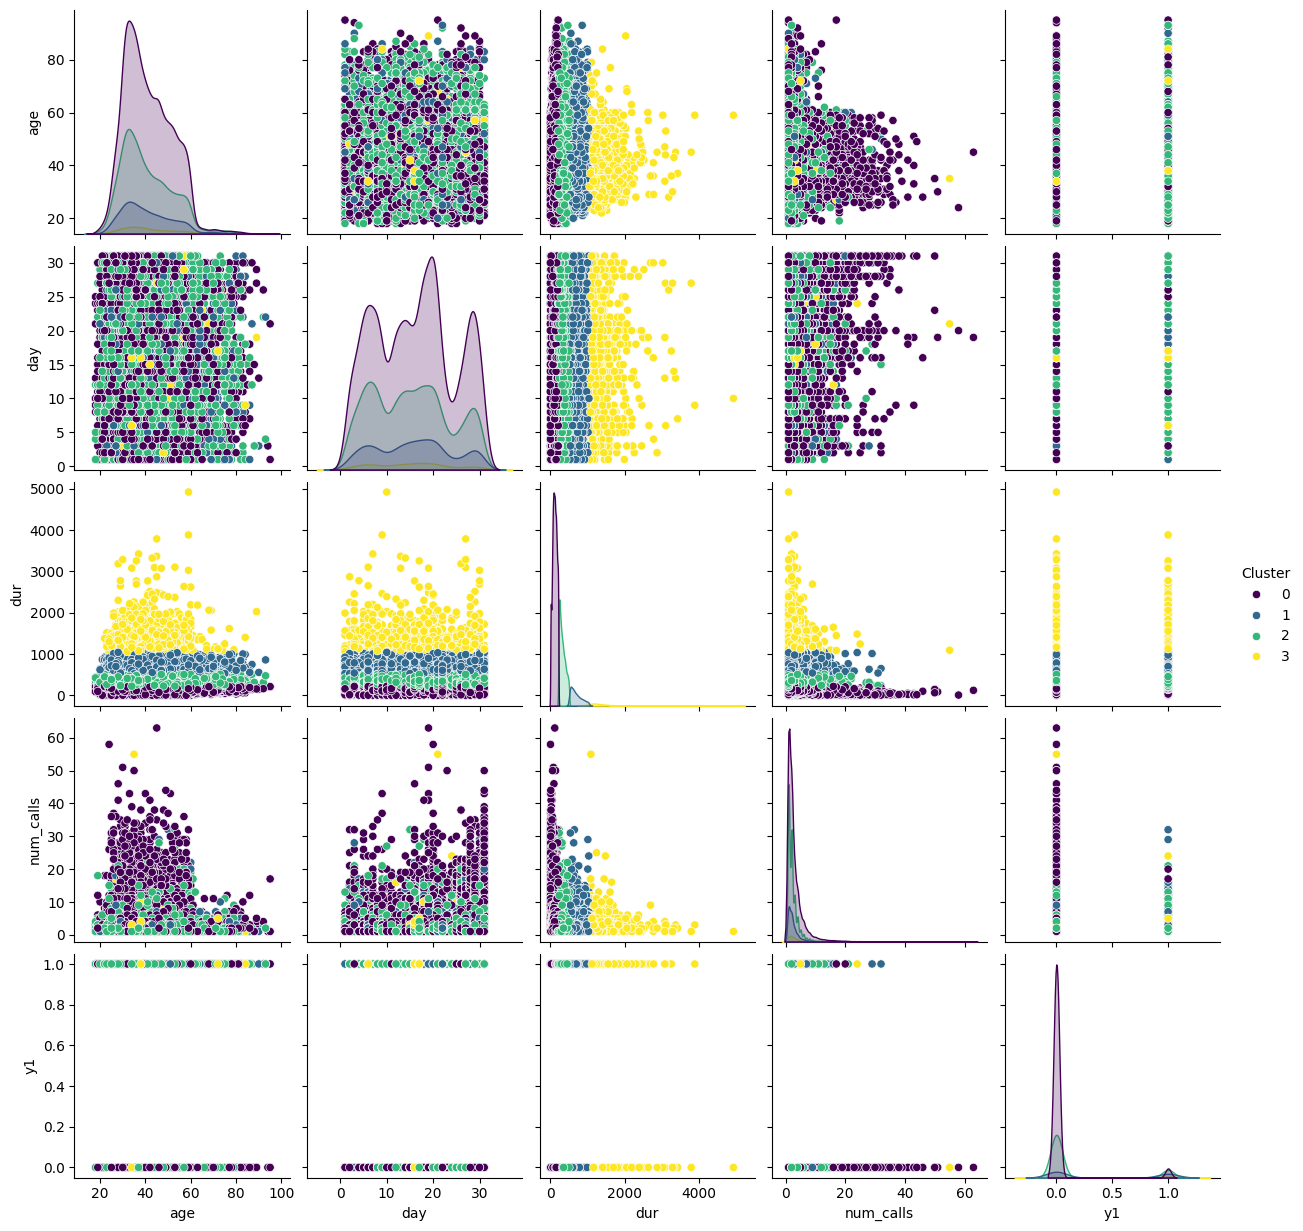

In [153]:
import seaborn as sns

# Plot pairplot with cluster labels
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [154]:
X

,job,marital,education_qual,call_type,day,mon,age,dur,num_calls,prev_outcome
0,4.0,1,2.0,2,5,5,58,261,1,3
1,9.0,2,1.0,2,5,5,44,151,1,3
2,2.0,1,1.0,2,5,5,33,76,1,3
3,1.0,1,3.0,2,5,5,47,92,1,3
4,11.0,2,3.0,2,5,5,33,198,1,3
...,...,...,...,...,...,...,...,...,...,...
45206,9.0,1,2.0,0,17,11,51,977,3,3
45207,5.0,0,0.0,0,17,11,71,456,2,3
45208,5.0,1,1.0,0,17,11,72,1127,5,2
45209,1.0,1,1.0,1,17,11,57,508,4,3


In [155]:
kmeans_model_new.predict([[5.0,1,1.0,2,5,5,42,15,2,3]])

c:\Users\yaazhisai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])